In [10]:
import talib as ta 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import datetime as dt 
import yfinance as yf

import mplfinance as mpf

In [11]:
ticker = yf.Ticker('SPY')
start_date = dt.datetime.now() - dt.timedelta(days=365*2) # 2YTD
data = ticker.history(start=start_date)

In [12]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-02-12 00:00:00-05:00,489.079431,491.353207,488.171844,488.894012,56502300,0.0,0.0,0.0
2024-02-13 00:00:00-05:00,482.599587,485.097825,478.881504,482.160431,113099200,0.0,0.0,0.0
2024-02-14 00:00:00-05:00,484.805088,487.030082,482.472732,486.542145,68387800,0.0,0.0,0.0
2024-02-15 00:00:00-05:00,487.244788,490.084589,486.766589,489.899170,61683000,0.0,0.0,0.0
2024-02-16 00:00:00-05:00,489.596673,490.738430,486.717828,487.459503,75532900,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2026-02-05 00:00:00-05:00,680.940002,683.690002,675.789978,677.619995,113610800,0.0,0.0,0.0
2026-02-06 00:00:00-05:00,681.460022,692.309998,680.849976,690.619995,89127600,0.0,0.0,0.0
2026-02-09 00:00:00-05:00,689.419983,695.869995,688.340027,693.950012,73885200,0.0,0.0,0.0


# Moving Averages

## Simple Moving Average (SMA)

SMA is the average of closing prices over a specified period.

**Formula:**
$$\text{SMA}_n = \frac{1}{n} \sum_{i=1}^{n} P_i$$

Where:
- $P_i$ are the closing prices
- $n$ is the number of periods (timeperiod)

**How it works:**
- Day 100: Average of days 1-100
- Day 101: Average of days 2-101
- Day 102: Average of days 3-102
- And so on...

It "smooths out" price fluctuations to show the trend. The first 100 values are `NaN` because we need 100 data points before calculating the first average.

In [13]:
data['SMA100'] = ta.SMA(data['Close'], timeperiod=100)

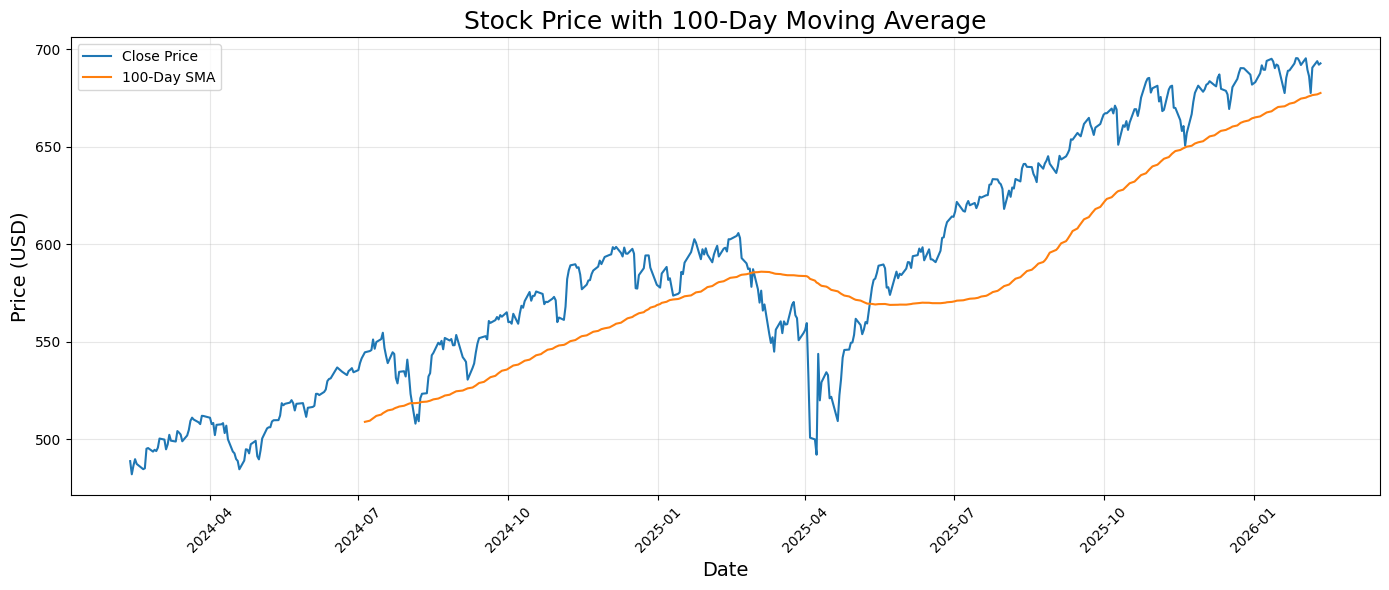

In [14]:
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Close Price', linewidth=1.5)
plt.plot(data['SMA100'], label='100-Day SMA', linewidth=1.5)

plt.title('Stock Price with 100-Day Moving Average', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

## Exponential Moving Average (EMA)

EMA is similar to SMA but gives more weight to recent prices. It responds faster to price changes than a simple moving average.

**Formula:**
$$\text{EMA}_t = P_t \cdot \alpha + \text{EMA}_{t-1} \cdot (1 - \alpha)$$

Where:
- $P_t$ is the current price
- $\alpha = \frac{2}{n+1}$ is the smoothing factor
- $n$ is the number of periods (timeperiod)

**Key differences from SMA:**
- **Responsive**: Reacts faster to recent price changes because recent prices have higher weight
- **Recursive**: Each EMA value depends on the previous EMA value
- **No NaN values at start**: Can be calculated from the first value using the first price as the starting EMA

**When to use:**
- SMA: Good for identifying long-term trends
- EMA: Better for short-term trading and catching trend changes quickly

In [15]:
data['EMA100'] = ta.EMA(data['Close'], timeperiod=100)

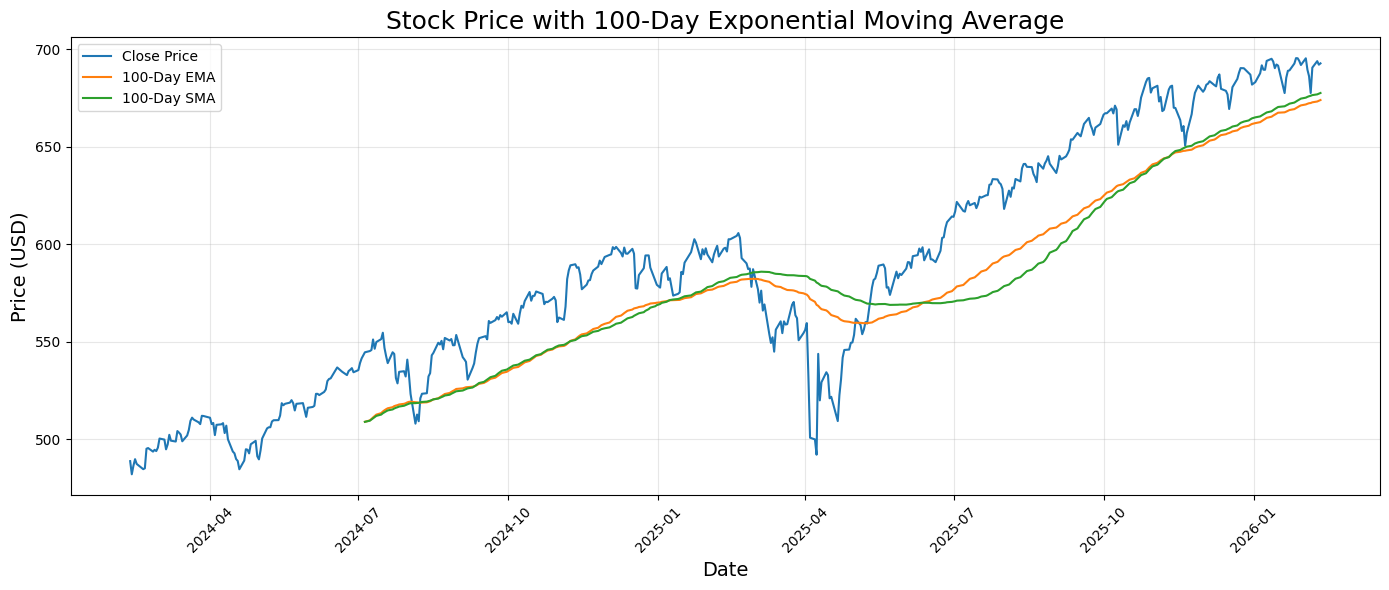

In [16]:
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Close Price', linewidth=1.5)
plt.plot(data['EMA100'], label='100-Day EMA', linewidth=1.5)
plt.plot(data['SMA100'], label='100-Day SMA', linewidth=1.5)

plt.title('Stock Price with 100-Day Exponential Moving Average', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

## Relative Strength Index (RSI)

RSI is a momentum oscillator that measures the magnitude of recent price changes to evaluate overbought or oversold conditions.

**Formula:**
$$\text{RSI} = 100 - \frac{100}{1 + RS}$$

Where:
$$RS = \frac{\text{Average Gain}}{\text{Average Loss}}$$

**Average Gain and Loss Calculation:**

For the first period (typically 14 days):
$$\text{Average Gain} = \frac{\sum_{i=1}^{n} \text{Gain}_i}{n}$$
$$\text{Average Loss} = \frac{\sum_{i=1}^{n} |\text{Loss}_i|}{n}$$

Where $\text{Gain}_i = \max(P_i - P_{i-1}, 0)$ and $\text{Loss}_i = \max(P_{i-1} - P_i, 0)$

For subsequent periods, exponential smoothing is used:
$$\text{Average Gain}_{\text{new}} = \frac{\text{Average Gain}_{\text{old}} \times (n-1) + \text{Current Gain}}{n}$$
$$\text{Average Loss}_{\text{new}} = \frac{\text{Average Loss}_{\text{old}} \times (n-1) + \text{Current Loss}}{n}$$

**Interpretation:**
- **RSI > 70**: Overbought condition (price may be overvalued, potential sell signal)
- **RSI < 30**: Oversold condition (price may be undervalued, potential buy signal)
- **30-70**: Neutral zone (no overbought/oversold signal)

**Key characteristics:**
- Oscillates between 0 and 100
- More useful in ranging markets than trending markets
- Can signal momentum shifts before price reverses
- Complements moving averages by showing strength of the trend

In [17]:
data['RSI'] = ta.RSI(data['Close'], timeperiod=14)

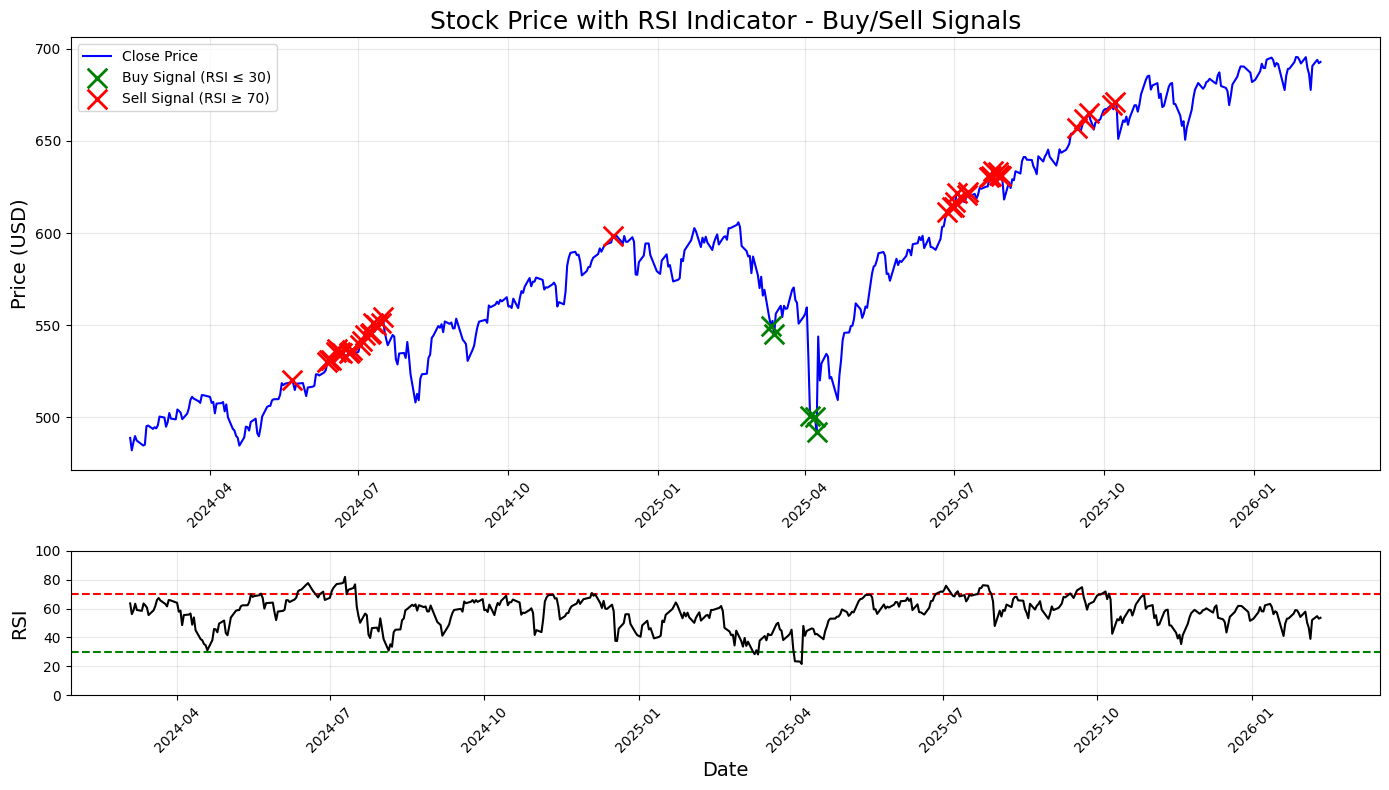

In [18]:
fig, ax = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]}, figsize=(14, 8))

# Top subplot: Close Price
ax[0].plot(data['Close'], label='Close Price', linewidth=1.5, color='blue')

# Identify buy and sell signals
buy_signals = data[data['RSI'] <= 30]
sell_signals = data[data['RSI'] >= 70]

# Add buy signals (green X)
ax[0].scatter(buy_signals.index, buy_signals['Close'], marker='x', color='green', 
              s=200, linewidths=2, label='Buy Signal (RSI ≤ 30)', zorder=5)

# Add sell signals (red X)
ax[0].scatter(sell_signals.index, sell_signals['Close'], marker='x', color='red', 
              s=200, linewidths=2, label='Sell Signal (RSI ≥ 70)', zorder=5)

ax[0].set_title('Stock Price with RSI Indicator - Buy/Sell Signals', fontsize=18)
ax[0].set_ylabel('Price (USD)', fontsize=14)
ax[0].legend(fontsize=10, loc='upper left')
ax[0].grid(True, alpha=0.3)



# Bottom subplot: RSI
ax[1].axhline(y=70, color='red', ls='dashed', linewidth=1.5, label='Overbought (70)')
ax[1].axhline(y=30, color='green', ls='dashed', linewidth=1.5, label='Oversold (30)')
ax[1].plot(data['RSI'], color='black', linewidth=1.5, label='RSI (14)')
ax[1].set_ylabel('RSI', fontsize=14)
ax[1].set_xlabel('Date', fontsize=14)
ax[1].set_ylim([0, 100])
#ax[1].legend(fontsize=10, loc='upper left')
ax[1].grid(True, alpha=0.3)

# Rotate x-axis labels for both subplots
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()

# Linear Regression

Linear Regression fits a straight line through price data to identify the overall trend direction and magnitude. It calculates the line of best fit using the least squares method.

**Formula:**
$$y = mx + b$$

Where:
- $y$ is the predicted price
- $m$ is the slope (trend direction/strength)
- $x$ is the time period
- $b$ is the y-intercept

The line is calculated to minimize the sum of squared errors between actual prices and predicted values:
$$\text{SSE} = \sum_{i=1}^{n} (P_i - \hat{P}_i)^2$$

**Key characteristics:**
- **Trend identification**: Shows the overall direction (uptrend if positive slope, downtrend if negative)
- **Support/Resistance**: Acts as dynamic support or resistance level
- **Deviation detection**: Large deviations from the line suggest potential reversals
- **Mean reversion**: Prices tend to gravitate back toward the regression line

**When to use:**
- Identifying long-term trends more clearly than moving averages
- Finding potential entry/exit points when price deviates significantly from the line
- Confirming trend strength with slope magnitude
- Combining with other indicators for confirmation

### Entry/Exit Strategies Using Linear Regression

#### 1. Mean Reversion Strategy
- **Entry**: Buy when price is significantly **below** the regression line (typically 1-2 standard deviations below)
- **Exit**: Sell when price **returns to or crosses above** the line
- **Logic**: Prices tend to revert back toward the trend line

#### 2. Trend Following Strategy
- **Entry**: Buy when price is **above** the line AND the slope is **positive** (uptrend confirmed)
- **Exit**: Sell when price **breaks below** the line or slope becomes negative
- **Logic**: Trade in the direction of the trend

#### 3. Support/Resistance Bounces
- **Entry**: Buy when price bounces off the regression line from below (in an uptrend)
- **Exit**: Take profit at resistance or when price moves significantly above
- **Logic**: The line acts as dynamic support in uptrends and resistance in downtrends

#### 4. Deviation Magnitude Strategy
- Calculate the distance (deviation) from price to the line
- **Entry**: When deviation is extreme (price far from line - potential reversal)
- **Exit**: When deviation normalizes (price returns to line)
- **Logic**: Extreme deviations are unsustainable

#### 5. Trend Strength Confirmation
- **Steep positive slope** = Strong uptrend (good for buying)
- **Steep negative slope** = Strong downtrend (good for shorting)
- **Flat slope** = No clear trend (avoid trading or use range strategies)

In [19]:
data['LINREG100'] = ta.LINEARREG(data['Close'], timeperiod=100)

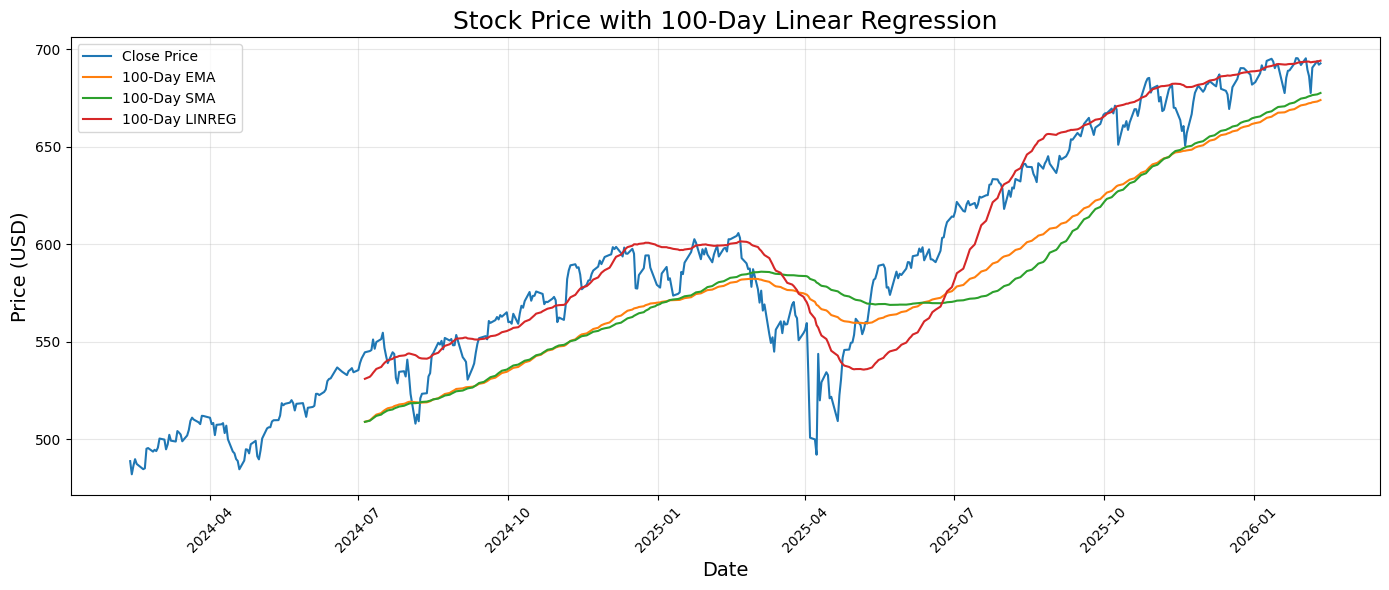

In [20]:
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Close Price', linewidth=1.5)
plt.plot(data['EMA100'], label='100-Day EMA', linewidth=1.5)
plt.plot(data['SMA100'], label='100-Day SMA', linewidth=1.5)
plt.plot(data['LINREG100'], label= '100-Day LINREG', linewidth=1.5)

plt.title('Stock Price with 100-Day Linear Regression', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

# MACD (Moving Average Convergence Divergence)

MACD is a trend-following momentum indicator that shows the relationship between two exponential moving averages (EMAs) of prices. It helps identify trend direction, momentum, and potential entry/exit points.

**Formula:**

$$\text{MACD} = \text{EMA}_{12} - \text{EMA}_{26}$$

$$\text{Signal Line} = \text{EMA}_9(\text{MACD})$$

$$\text{MACD Histogram} = \text{MACD} - \text{Signal Line}$$

Where:
- **MACD Line**: The difference between a 12-period and 26-period EMA
- **Signal Line**: A 9-period EMA of the MACD line itself
- **MACD Histogram**: Visual representation of the difference between MACD and signal line

**Key characteristics:**

- **MACD > Signal Line**: Positive momentum (bullish), price likely to continue up
- **MACD < Signal Line**: Negative momentum (bearish), price likely to continue down
- **MACD Crossover**: When MACD crosses above signal line = **buy signal**; when MACD crosses below signal line = **sell signal**
- **Histogram bars**: Positive bars (green) indicate MACD above signal; negative bars (red) indicate MACD below signal
- **Divergence**: When MACD and price move in opposite directions, indicates potential reversal

**Advantages:**
- Combines trend-following and momentum into one indicator
- Clear buy/sell signals from crossovers
- Visual representation with histogram makes it easy to interpret
- Works well in trending markets

**Disadvantages:**
- Lags price action (uses moving averages, which are lagging indicators)
- Can generate false signals in ranging/sideways markets
- Best used with confirmation from other indicators

**Trading strategies:**
1. **Crossover Strategy**: Buy when MACD crosses above signal line, sell when it crosses below
2. **Histogram Strategy**: Monitor histogram expansion/contraction to gauge momentum strength
3. **Divergence Strategy**: Trade when MACD and price diverge (opposite movements)
4. **Confirmation**: Use with price action, volume, and other indicators for better signals


In [21]:
MACD, MACD_signal, MACD_hist = ta.MACD(data['Close'])

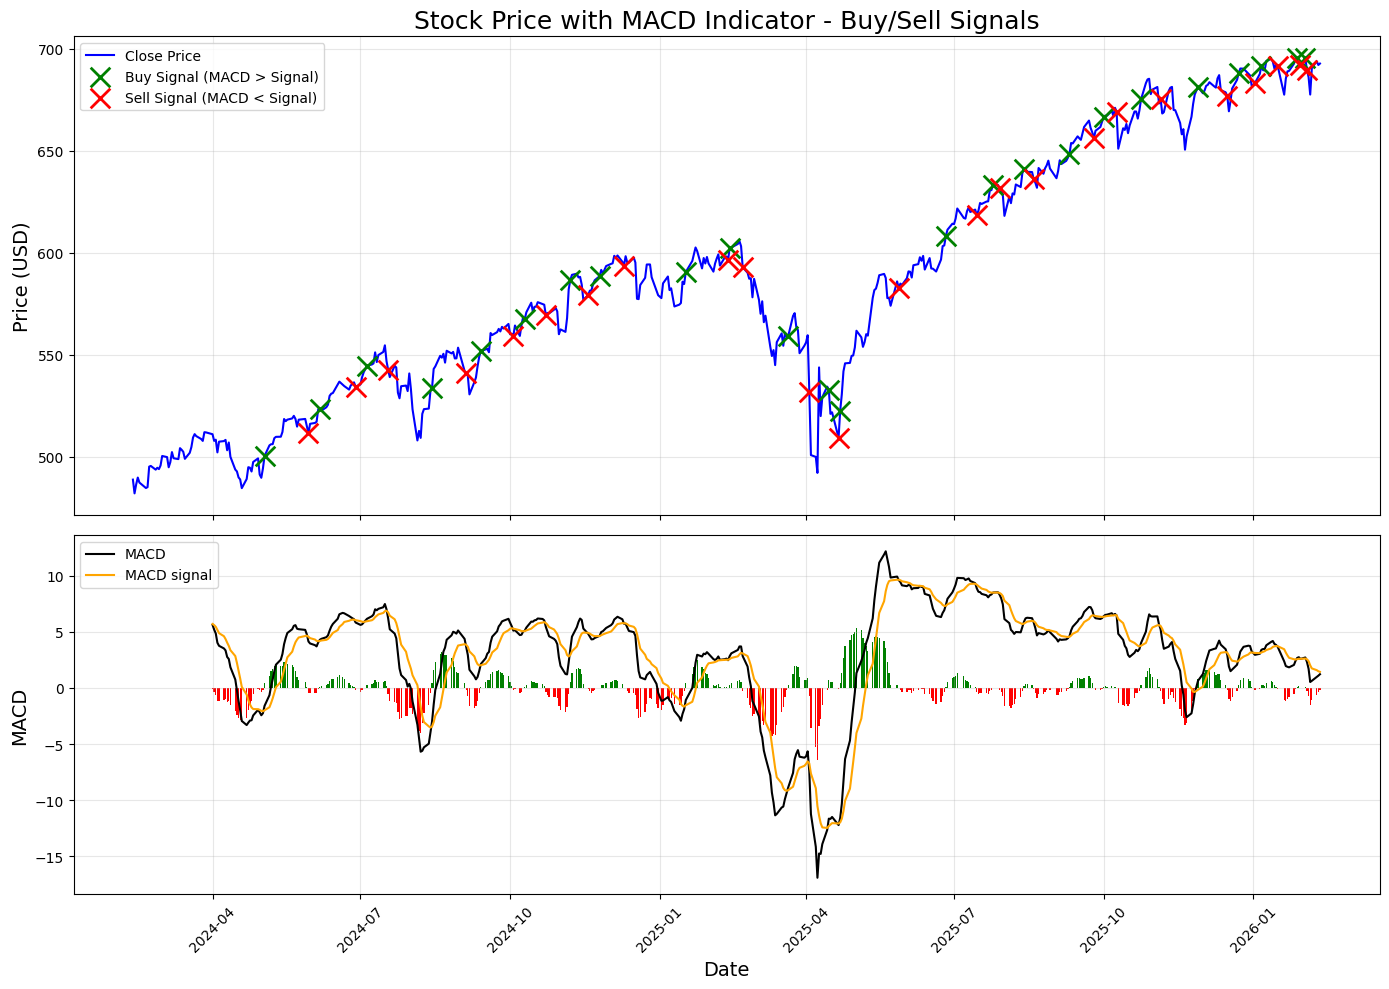

In [22]:
fig, ax = plt.subplots(2, 1, gridspec_kw={"height_ratios": [2, 1.5]}, figsize=(14, 10), sharex=True)

c_list = ["red" if val < 0 else "green" for val in MACD_hist]

# Identify buy and sell signals based on MACD crossovers
buy_signals_macd = []
sell_signals_macd = []

for i in range(1, len(MACD)):
    # Buy signal: MACD crosses above signal line
    if MACD.iloc[i-1] <= MACD_signal.iloc[i-1] and MACD.iloc[i] > MACD_signal.iloc[i]:
        buy_signals_macd.append(data.index[i])
    # Sell signal: MACD crosses below signal line
    elif MACD.iloc[i-1] >= MACD_signal.iloc[i-1] and MACD.iloc[i] < MACD_signal.iloc[i]:
        sell_signals_macd.append(data.index[i])

# Top subplot: Close Price
ax[0].plot(data['Close'], label='Close Price', linewidth=1.5, color='blue')

# Add buy signals (green X)
for signal_date in buy_signals_macd:
    ax[0].scatter(signal_date, data.loc[signal_date, 'Close'], marker='x', color='green', 
                  s=200, linewidths=2, zorder=5)

# Add sell signals (red X)
for signal_date in sell_signals_macd:
    ax[0].scatter(signal_date, data.loc[signal_date, 'Close'], marker='x', color='red', 
                  s=200, linewidths=2, zorder=5)

# Add legend with buy/sell signals
if buy_signals_macd or sell_signals_macd:
    ax[0].scatter([], [], marker='x', color='green', s=200, linewidths=2, label='Buy Signal (MACD > Signal)')
    ax[0].scatter([], [], marker='x', color='red', s=200, linewidths=2, label='Sell Signal (MACD < Signal)')

ax[0].set_title('Stock Price with MACD Indicator - Buy/Sell Signals', fontsize=18)
ax[0].set_ylabel('Price (USD)', fontsize=14)
ax[0].legend(fontsize=10, loc='upper left')
ax[0].grid(True, alpha=0.3)

# Bottom subplot: MACD
ax[1].plot(MACD, color='black', linewidth=1.5, label='MACD')
ax[1].plot(MACD_signal, color='orange', linewidth=1.5, label='MACD signal')
ax[1].bar(MACD_hist.index, MACD_hist, color = c_list)
ax[1].set_ylabel('MACD', fontsize=14)
ax[1].set_xlabel('Date', fontsize=14)
ax[1].legend(fontsize=10, loc='upper left')
ax[1].grid(True, alpha=0.3)

# Rotate x-axis labels for both subplots
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()

In [23]:
ticker = yf.Ticker('GOOGL')
start_date = dt.datetime.now() - dt.timedelta(days=120) 
data = ticker.history(start=start_date)
data['ENGULFING'] = ta.CDLENGULFING(data['Open'], data['High'], data['Low'], data['Close'])

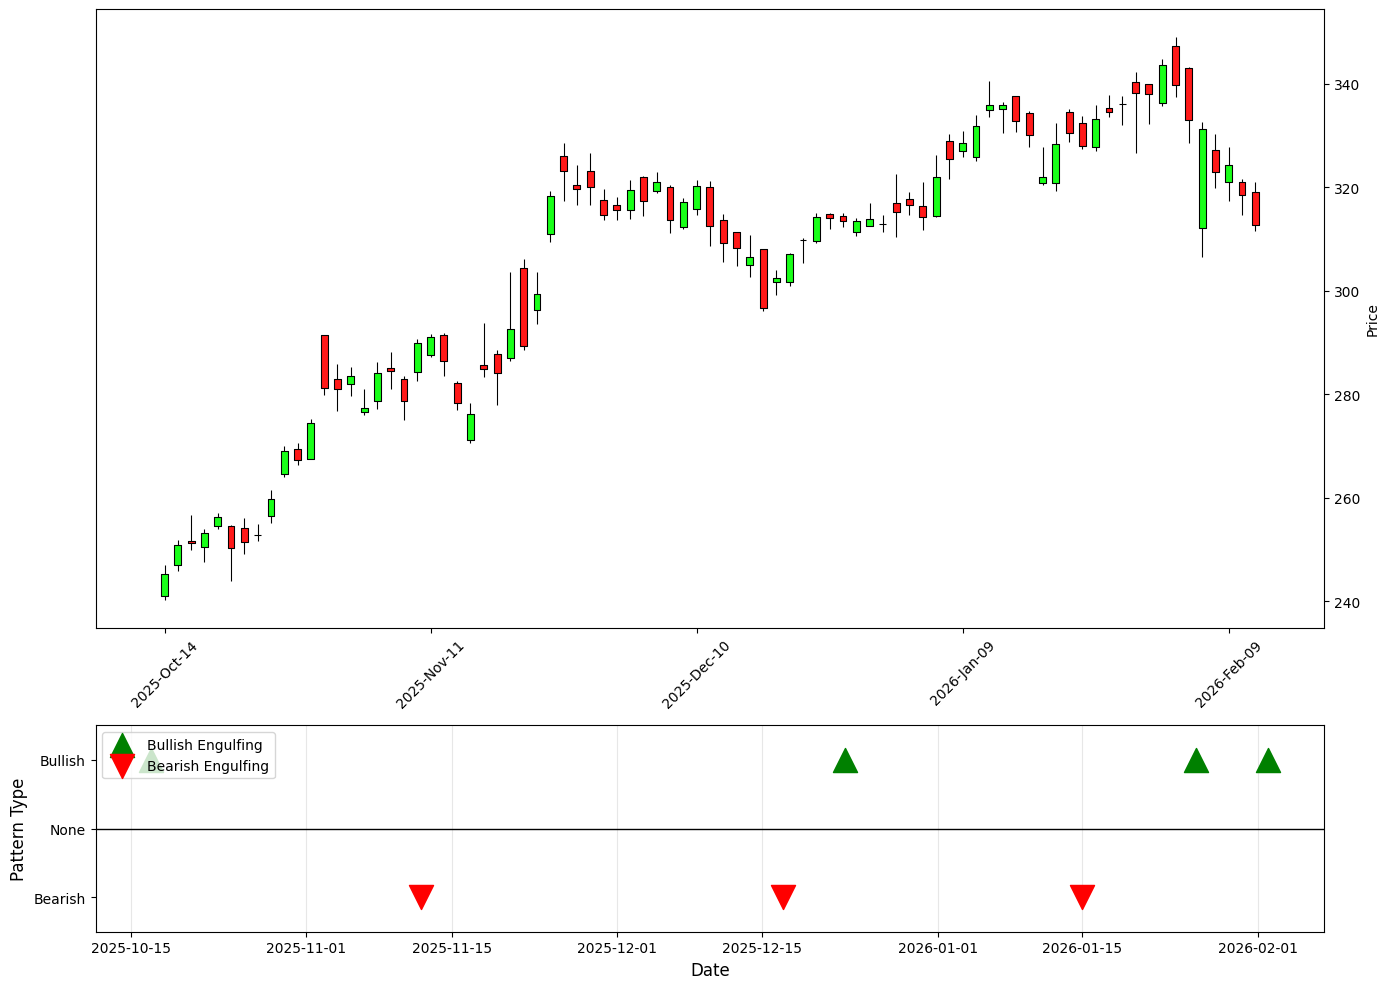

In [24]:
fig, ax = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]}, figsize=(14, 10))

colors = mpf.make_marketcolors(up="#00ff00", down = "#ff0000")
mpf_style = mpf.make_mpf_style(base_mpf_style = "yahoo", marketcolors = colors)

mpf.plot(data, type = "candle", ax = ax[0], style = mpf_style)

# Bottom subplot: Engulfing pattern - improved clarity
engulfing_signals = data[data['ENGULFING'] != 0]

if len(engulfing_signals) > 0:
    # Separate bullish and bearish engulfing patterns
    bullish = engulfing_signals[engulfing_signals['ENGULFING'] > 0]
    bearish = engulfing_signals[engulfing_signals['ENGULFING'] < 0]
    
    # Plot bullish engulfing (green)
    if len(bullish) > 0:
        ax[1].scatter(bullish.index, [1] * len(bullish), marker='^', color='green', 
                     s=300, label='Bullish Engulfing', zorder=5)
    
    # Plot bearish engulfing (red)
    if len(bearish) > 0:
        ax[1].scatter(bearish.index, [-1] * len(bearish), marker='v', color='red', 
                     s=300, label='Bearish Engulfing', zorder=5)

ax[1].axhline(y=0, color='black', linestyle='-', linewidth=1)
ax[1].set_ylabel('Pattern Type', fontsize=12)
ax[1].set_xlabel('Date', fontsize=12)
ax[1].set_ylim([-1.5, 1.5])
ax[1].set_yticks([-1, 0, 1])
ax[1].set_yticklabels(['Bearish', 'None', 'Bullish'])
ax[1].legend(fontsize=10, loc='upper left')
ax[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()

In [25]:
# Trade Tracking System for All Indicators

class TradeTracker:
    """Track winning and losing trades for technical indicators"""
    
    def __init__(self):
        self.trades = {}  # {indicator_name: [trades]}
    
    def add_trade(self, indicator_name, entry_date, entry_price, exit_date, exit_price):
        """
        Add a completed trade for an indicator
        
        Args:
            indicator_name: Name of the indicator (e.g., 'RSI', 'MACD', 'Engulfing')
            entry_date: Datetime of buy signal
            entry_price: Price at buy signal
            exit_date: Datetime of sell signal
            exit_price: Price at sell signal
        """
        if indicator_name not in self.trades:
            self.trades[indicator_name] = []
        
        pnl = exit_price - entry_price
        return_pct = (pnl / entry_price) * 100
        is_win = pnl > 0
        
        trade = {
            'entry_date': entry_date,
            'entry_price': entry_price,
            'exit_date': exit_date,
            'exit_price': exit_price,
            'pnl': pnl,
            'return_pct': return_pct,
            'is_win': is_win,
            'days_held': (exit_date - entry_date).days
        }
        
        self.trades[indicator_name].append(trade)
        return trade
    
    def get_summary(self, indicator_name):
        """Get summary statistics for an indicator's trades"""
        if indicator_name not in self.trades or len(self.trades[indicator_name]) == 0:
            return None
        
        trades = self.trades[indicator_name]
        wins = [t for t in trades if t['is_win']]
        losses = [t for t in trades if not t['is_win']]
        
        total_pnl = sum(t['pnl'] for t in trades)
        total_return_pct = sum(t['return_pct'] for t in trades)
        avg_return = total_return_pct / len(trades) if trades else 0
        
        summary = {
            'indicator': indicator_name,
            'total_trades': len(trades),
            'winning_trades': len(wins),
            'losing_trades': len(losses),
            'win_rate': (len(wins) / len(trades) * 100) if trades else 0,
            'total_pnl': total_pnl,
            'total_return_pct': total_return_pct,
            'avg_return_pct': avg_return,
            'avg_win': sum(t['pnl'] for t in wins) / len(wins) if wins else 0,
            'avg_loss': sum(t['pnl'] for t in losses) / len(losses) if losses else 0,
            'best_trade': max(trades, key=lambda x: x['pnl'])['pnl'] if trades else 0,
            'worst_trade': min(trades, key=lambda x: x['pnl'])['pnl'] if trades else 0,
            'avg_days_held': sum(t['days_held'] for t in trades) / len(trades) if trades else 0
        }
        
        return summary
    
    def get_all_summaries(self):
        """Get summary statistics for all indicators"""
        summaries = []
        for indicator_name in self.trades.keys():
            summary = self.get_summary(indicator_name)
            if summary:
                summaries.append(summary)
        return summaries
    
    def get_trades_dataframe(self, indicator_name):
        """Convert trades for an indicator to a DataFrame"""
        if indicator_name not in self.trades:
            return None
        return pd.DataFrame(self.trades[indicator_name])
    
    def print_report(self, indicator_name=None):
        """Print a formatted report of trades"""
        if indicator_name:
            summaries = [self.get_summary(indicator_name)]
        else:
            summaries = self.get_all_summaries()
        
        for summary in summaries:
            if summary:
                print(f"\n{'='*60}")
                print(f"TRADE REPORT: {summary['indicator']}")
                print(f"{'='*60}")
                print(f"Total Trades:        {summary['total_trades']}")
                print(f"Winning Trades:      {summary['winning_trades']}")
                print(f"Losing Trades:       {summary['losing_trades']}")
                print(f"Win Rate:            {summary['win_rate']:.1f}%")
                print(f"\nP&L Summary:")
                print(f"  Total P&L:         ${summary['total_pnl']:.2f}")
                print(f"  Total Return %:    {summary['total_return_pct']:.2f}%")
                print(f"  Avg Return/Trade:  {summary['avg_return_pct']:.2f}%")
                print(f"  Best Trade:        ${summary['best_trade']:.2f}")
                print(f"  Worst Trade:       ${summary['worst_trade']:.2f}")
                print(f"  Avg Win:           ${summary['avg_win']:.2f}")
                print(f"  Avg Loss:          ${summary['avg_loss']:.2f}")
                print(f"\nAverage Days Held:   {summary['avg_days_held']:.1f} days")

# Initialize the tracker
tracker = TradeTracker()
print("Trade Tracker initialized. Use tracker.add_trade() to log trades.")

Trade Tracker initialized. Use tracker.add_trade() to log trades.


In [26]:
# Example: Track MACD trades from earlier analysis
# Reload data for 2-year period to match buy_signals_macd and sell_signals_macd

ticker = yf.Ticker('GOOGL')
start_date = dt.datetime.now() - dt.timedelta(days=365*2)
data_full = ticker.history(start=start_date)

# Calculate MACD again on full data
MACD_full, MACD_signal_full, MACD_hist_full = ta.MACD(data_full['Close'])
data_full['MACD'] = MACD_full
data_full['MACD_signal'] = MACD_signal_full

# Identify MACD crossovers
buy_dates_macd = []
sell_dates_macd = []

for i in range(1, len(MACD_full)):
    if MACD_full.iloc[i-1] <= MACD_signal_full.iloc[i-1] and MACD_full.iloc[i] > MACD_signal_full.iloc[i]:
        buy_dates_macd.append(data_full.index[i])
    elif MACD_full.iloc[i-1] >= MACD_signal_full.iloc[i-1] and MACD_full.iloc[i] < MACD_signal_full.iloc[i]:
        sell_dates_macd.append(data_full.index[i])

# Pair buy and sell signals to create completed trades
for i, buy_date in enumerate(buy_dates_macd):
    # Find the next sell signal after this buy signal
    sell_dates_after_buy = [s for s in sell_dates_macd if s > buy_date]
    if sell_dates_after_buy:
        sell_date = sell_dates_after_buy[0]
        entry_price = data_full.loc[buy_date, 'Close']
        exit_price = data_full.loc[sell_date, 'Close']
        tracker.add_trade('MACD', buy_date, entry_price, sell_date, exit_price)

# Print MACD results
tracker.print_report('MACD')

# Display detailed trade list for MACD
print("\nDetailed MACD Trades:")
macd_trades_df = tracker.get_trades_dataframe('MACD')
if macd_trades_df is not None:
    print(macd_trades_df.to_string())


TRADE REPORT: MACD
Total Trades:        21
Winning Trades:      13
Losing Trades:       8
Win Rate:            61.9%

P&L Summary:
  Total P&L:         $85.51
  Total Return %:    40.97%
  Avg Return/Trade:  1.95%
  Best Trade:        $35.67
  Worst Trade:       $-12.64
  Avg Win:           $9.89
  Avg Loss:          $-5.38

Average Days Held:   16.3 days

Detailed MACD Trades:
                  entry_date  entry_price                 exit_date  exit_price        pnl  return_pct  is_win  days_held
0  2024-04-26 00:00:00-04:00   170.660568 2024-05-23 00:00:00-04:00  172.248535   1.587967    0.930483    True         27
1  2024-06-25 00:00:00-04:00   182.859558 2024-07-12 00:00:00-04:00  183.892975   1.033417    0.565142    True         17
2  2024-08-16 00:00:00-04:00   161.923599 2024-09-04 00:00:00-04:00  155.454987  -6.468613   -3.994855   False         19
3  2024-09-16 00:00:00-04:00   157.263138 2024-10-11 00:00:00-04:00  162.417038   5.153900    3.277246    True         25
4  2024-

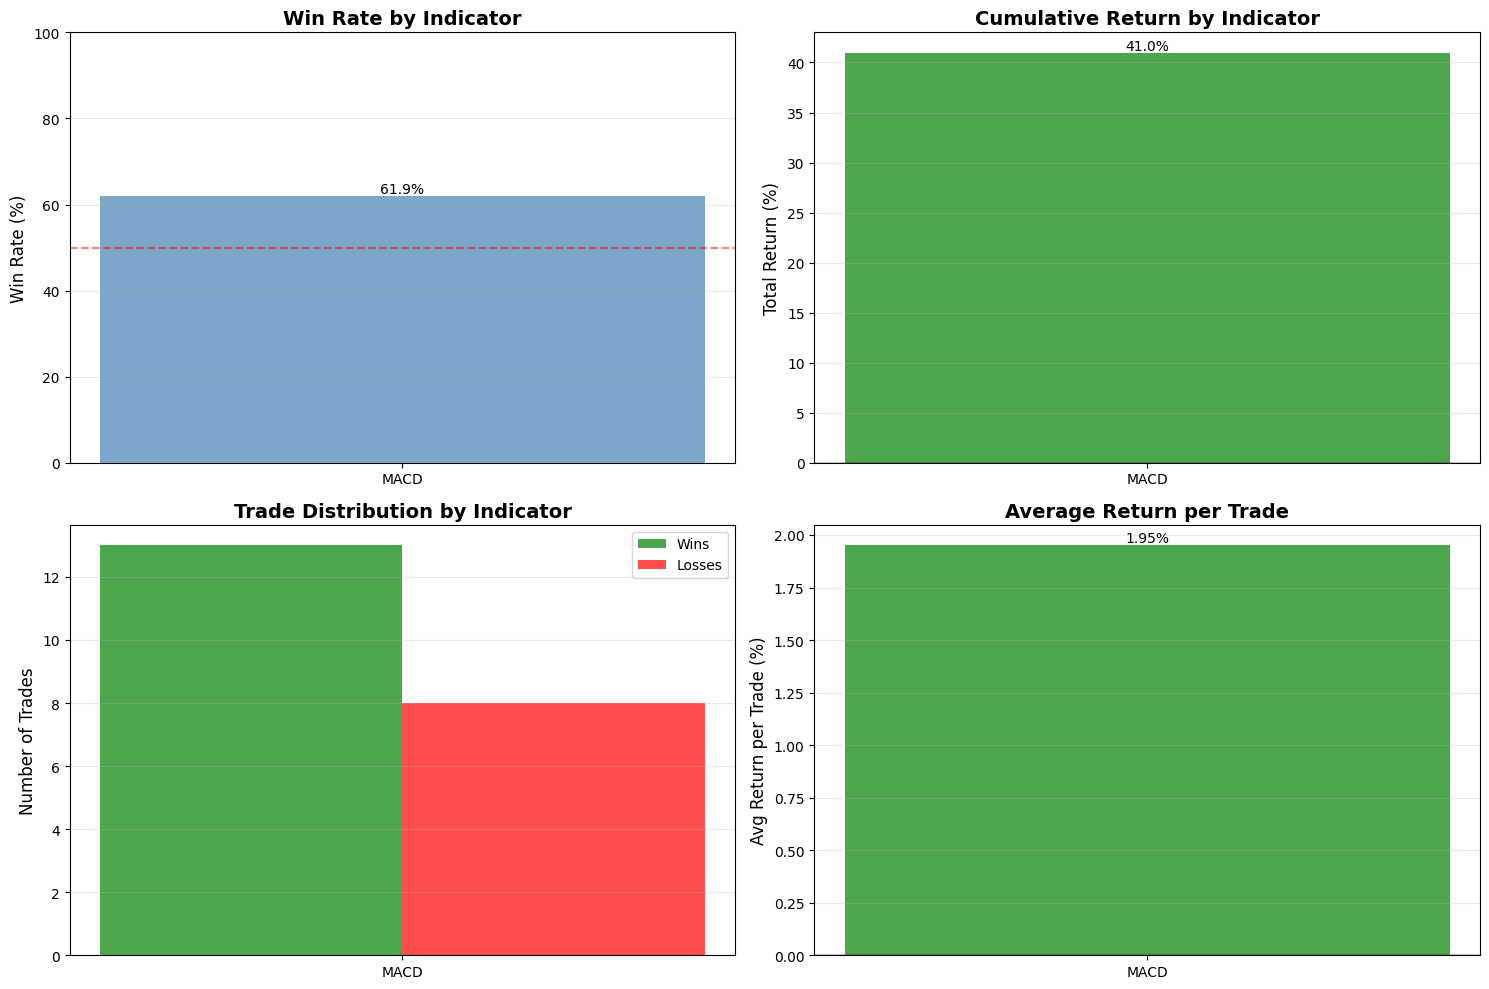


Performance Summary Table:
indicator  total_trades  winning_trades  win_rate  total_return_pct  avg_return_pct  best_trade  worst_trade
     MACD            21              13 61.904762         40.966193        1.950771   35.665802   -12.640488


In [27]:
# Visualization: Compare Indicator Performance

summaries = tracker.get_all_summaries()

if summaries:
    summary_df = pd.DataFrame(summaries)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Win Rate Comparison
    ax = axes[0, 0]
    bars1 = ax.bar(summary_df['indicator'], summary_df['win_rate'], color='steelblue', alpha=0.7)
    ax.axhline(y=50, color='red', linestyle='--', alpha=0.5, label='50% (breakeven)')
    ax.set_ylabel('Win Rate (%)', fontsize=12)
    ax.set_title('Win Rate by Indicator', fontsize=14, fontweight='bold')
    ax.set_ylim([0, 100])
    ax.grid(True, alpha=0.3, axis='y')
    for bar in bars1:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=10)
    
    # 2. Total Return Comparison
    ax = axes[0, 1]
    colors = ['green' if x > 0 else 'red' for x in summary_df['total_return_pct']]
    bars2 = ax.bar(summary_df['indicator'], summary_df['total_return_pct'], color=colors, alpha=0.7)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
    ax.set_ylabel('Total Return (%)', fontsize=12)
    ax.set_title('Cumulative Return by Indicator', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    for bar in bars2:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom' if height > 0 else 'top', fontsize=10)
    
    # 3. Trade Count
    ax = axes[1, 0]
    x_pos = range(len(summary_df))
    width = 0.35
    bars3a = ax.bar([p - width/2 for p in x_pos], summary_df['winning_trades'], width, 
                     label='Wins', color='green', alpha=0.7)
    bars3b = ax.bar([p + width/2 for p in x_pos], summary_df['losing_trades'], width, 
                     label='Losses', color='red', alpha=0.7)
    ax.set_ylabel('Number of Trades', fontsize=12)
    ax.set_title('Trade Distribution by Indicator', fontsize=14, fontweight='bold')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(summary_df['indicator'])
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3, axis='y')
    
    # 4. Avg Return per Trade
    ax = axes[1, 1]
    bars4 = ax.bar(summary_df['indicator'], summary_df['avg_return_pct'], 
                    color=['green' if x > 0 else 'red' for x in summary_df['avg_return_pct']], alpha=0.7)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
    ax.set_ylabel('Avg Return per Trade (%)', fontsize=12)
    ax.set_title('Average Return per Trade', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    for bar in bars4:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}%', ha='center', va='bottom' if height > 0 else 'top', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    print("\nPerformance Summary Table:")
    print("="*100)
    print(summary_df[['indicator', 'total_trades', 'winning_trades', 'win_rate', 
                      'total_return_pct', 'avg_return_pct', 'best_trade', 'worst_trade']].to_string(index=False))
    print("="*100)

In [28]:
# Helper function to easily track trades for any indicator

def track_indicator_trades(indicator_name, buy_dates, sell_dates, price_data):
    """
    Helper function to easily track trades for an indicator
    
    Args:
        indicator_name: Name of indicator (e.g., 'RSI', 'Engulfing')
        buy_dates: List of datetime objects for buy signals
        sell_dates: List of datetime objects for sell signals
        price_data: Series with close prices indexed by date
    
    Returns:
        Number of trades added to tracker
    """
    trades_added = 0
    
    for i, buy_date in enumerate(buy_dates):
        # Find next sell signal after this buy signal
        sell_after_buy = [s for s in sell_dates if s > buy_date]
        
        if sell_after_buy:
            sell_date = sell_after_buy[0]
            
            # Get prices at buy and sell points
            if buy_date in price_data.index and sell_date in price_data.index:
                entry_price = price_data.loc[buy_date]
                exit_price = price_data.loc[sell_date]
                
                tracker.add_trade(indicator_name, buy_date, entry_price, sell_date, exit_price)
                trades_added += 1
    
    return trades_added

# Example usage for RSI (using the earlier data):
# Reload 2-year data
data_rsi = ticker.history(start=dt.datetime.now() - dt.timedelta(days=365*2))
data_rsi['RSI'] = ta.RSI(data_rsi['Close'], timeperiod=14)

# Identify RSI buy/sell signals
buy_dates_rsi = data_rsi[data_rsi['RSI'] <= 30].index.tolist()
sell_dates_rsi = data_rsi[data_rsi['RSI'] >= 70].index.tolist()

# Track RSI trades
rsi_trades = track_indicator_trades('RSI', buy_dates_rsi, sell_dates_rsi, data_rsi['Close'])
print(f"\nRSI: Added {rsi_trades} completed trades")
tracker.print_report('RSI')

# Display detailed RSI trade list
print("\nDetailed RSI Trades:")
rsi_trades_df = tracker.get_trades_dataframe('RSI')
if rsi_trades_df is not None and len(rsi_trades_df) > 0:
    print(rsi_trades_df.to_string())


RSI: Added 14 completed trades

TRADE REPORT: RSI
Total Trades:        14
Winning Trades:      14
Losing Trades:       0
Win Rate:            100.0%

P&L Summary:
  Total P&L:         $418.73
  Total Return %:    288.94%
  Avg Return/Trade:  20.64%
  Best Trade:        $45.50
  Worst Trade:       $15.34
  Avg Win:           $29.91
  Avg Loss:          $0.00

Average Days Held:   83.0 days

Detailed RSI Trades:
                  entry_date  entry_price                 exit_date  exit_price        pnl  return_pct  is_win  days_held
0  2024-03-04 00:00:00-05:00   132.349991 2024-04-26 00:00:00-04:00  170.660522  38.310532   28.946380    True         52
1  2024-03-05 00:00:00-05:00   131.675079 2024-04-26 00:00:00-04:00  170.660522  38.985443   29.607306    True         51
2  2024-03-06 00:00:00-05:00   130.414627 2024-04-26 00:00:00-04:00  170.660522  40.245895   30.859955    True         50
3  2024-08-05 00:00:00-04:00   158.237183 2024-10-30 00:00:00-04:00  173.580475  15.343292    9.6


COMPREHENSIVE INDICATOR PERFORMANCE COMPARISON

Indicator       Total        Wins         Losses       Win Rate   Total Return    Avg Return      Best Trade   Worst Trade 
------------------------------------------------------------------------------------------------------------------------
RSI             14           14           0            100.0%     288.94%         20.64%          $45.50       $15.34      
MACD            21           13           8            61.9%      40.97%          1.95%           $35.67       $-12.64     

ADDITIONAL METRICS:
------------------------------------------------------------------------------------------------------------------------
Indicator       Avg Days Held        Avg Win ($)          Avg Loss ($)        
------------------------------------------------------------------------------------------------------------------------
RSI             83.0                 29.91                0.00                
MACD            16.3                 

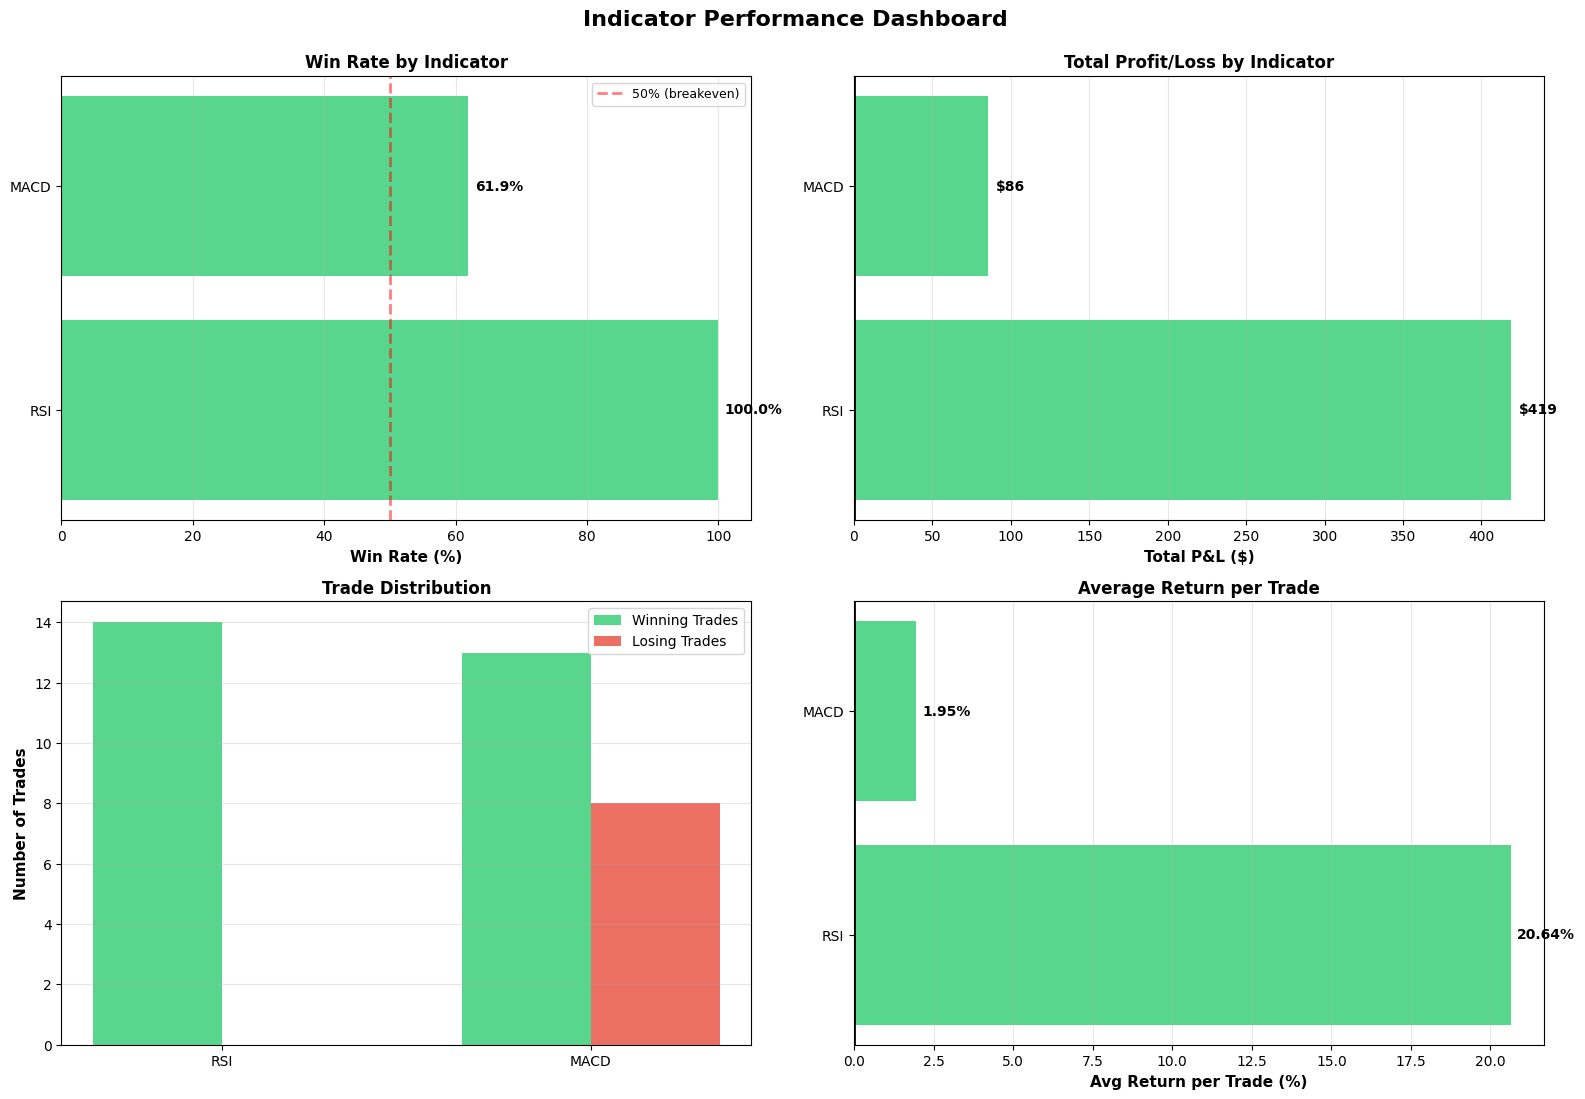


✓ Trade tracking complete! Use tracker.print_report('INDICATOR_NAME') for detailed stats.
✓ Use tracker.get_trades_dataframe('INDICATOR_NAME') to export trade details to Excel.
✓ Use tracker.get_all_summaries() to get all summary statistics as a DataFrame.


In [29]:
# Final Comprehensive Comparison of All Tracked Indicators

summaries = tracker.get_all_summaries()

if summaries:
    summary_df = pd.DataFrame(summaries)
    
    print("\n" + "="*120)
    print("COMPREHENSIVE INDICATOR PERFORMANCE COMPARISON")
    print("="*120)
    
    # Sort by win rate for easier comparison
    summary_df_sorted = summary_df.sort_values('win_rate', ascending=False).reset_index(drop=True)
    
    # Create a cleaner display
    print("\n{:<15} {:<12} {:<12} {:<12} {:<10} {:<15} {:<15} {:<12} {:<12}".format(
        'Indicator', 'Total', 'Wins', 'Losses', 'Win Rate', 'Total Return', 'Avg Return', 'Best Trade', 'Worst Trade'))
    print("-" * 120)
    
    for _, row in summary_df_sorted.iterrows():
        print("{:<15} {:<12} {:<12} {:<12} {:<10} {:<15} {:<15} {:<12} {:<12}".format(
            row['indicator'],
            int(row['total_trades']),
            int(row['winning_trades']),
            int(row['losing_trades']),
            f"{float(row['win_rate']):.1f}%",
            f"{float(row['total_return_pct']):.2f}%",
            f"{float(row['avg_return_pct']):.2f}%",
            f"${float(row['best_trade']):.2f}",
            f"${float(row['worst_trade']):.2f}"
        ))
    
    print("=" * 120)
    
    # Additional metrics
    print("\nADDITIONAL METRICS:")
    print("-" * 120)
    print("{:<15} {:<20} {:<20} {:<20}".format('Indicator', 'Avg Days Held', 'Avg Win ($)', 'Avg Loss ($)'))
    print("-" * 120)
    
    for _, row in summary_df_sorted.iterrows():
        print("{:<15} {:<20.1f} {:<20.2f} {:<20.2f}".format(
            row['indicator'],
            float(row['avg_days_held']),
            float(row['avg_win']),
            float(row['avg_loss'])
        ))
    
    print("=" * 120)
    
    # Visual comparison chart
    fig, axes = plt.subplots(2, 2, figsize=(16, 11))
    fig.suptitle('Indicator Performance Dashboard', fontsize=16, fontweight='bold', y=0.995)
    
    # 1. Win Rate Comparison
    ax = axes[0, 0]
    colors_wr = ['#2ecc71' if x >= 60 else '#f39c12' if x >= 50 else '#e74c3c' for x in summary_df_sorted['win_rate']]
    bars1 = ax.barh(summary_df_sorted['indicator'], summary_df_sorted['win_rate'], color=colors_wr, alpha=0.8)
    ax.axvline(x=50, color='red', linestyle='--', alpha=0.5, linewidth=2, label='50% (breakeven)')
    ax.set_xlabel('Win Rate (%)', fontsize=11, fontweight='bold')
    ax.set_title('Win Rate by Indicator', fontsize=12, fontweight='bold')
    ax.set_xlim([0, 105])
    ax.grid(True, alpha=0.3, axis='x')
    for i, bar in enumerate(bars1):
        width = bar.get_width()
        ax.text(width + 1, bar.get_y() + bar.get_height()/2., 
                f'{width:.1f}%', ha='left', va='center', fontsize=10, fontweight='bold')
    ax.legend(fontsize=9)
    
    # 2. Total P&L Comparison
    ax = axes[0, 1]
    colors_pl = ['#2ecc71' if x > 0 else '#e74c3c' for x in summary_df_sorted['total_pnl']]
    bars2 = ax.barh(summary_df_sorted['indicator'], summary_df_sorted['total_pnl'], color=colors_pl, alpha=0.8)
    ax.axvline(x=0, color='black', linestyle='-', linewidth=2)
    ax.set_xlabel('Total P&L ($)', fontsize=11, fontweight='bold')
    ax.set_title('Total Profit/Loss by Indicator', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='x')
    for i, bar in enumerate(bars2):
        width = bar.get_width()
        ax.text(width + (5 if width > 0 else -5), bar.get_y() + bar.get_height()/2., 
                f'${width:.0f}', ha='left' if width > 0 else 'right', va='center', fontsize=10, fontweight='bold')
    
    # 3. Trade Count (Win vs Loss)
    ax = axes[1, 0]
    x = range(len(summary_df_sorted))
    width = 0.35
    bars3a = ax.bar([i - width/2 for i in x], summary_df_sorted['winning_trades'], width,
                     label='Winning Trades', color='#2ecc71', alpha=0.8)
    bars3b = ax.bar([i + width/2 for i in x], summary_df_sorted['losing_trades'], width,
                     label='Losing Trades', color='#e74c3c', alpha=0.8)
    ax.set_ylabel('Number of Trades', fontsize=11, fontweight='bold')
    ax.set_title('Trade Distribution', fontsize=12, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(summary_df_sorted['indicator'])
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3, axis='y')
    
    # 4. Average Return per Trade
    ax = axes[1, 1]
    colors_ar = ['#2ecc71' if x > 0 else '#e74c3c' for x in summary_df_sorted['avg_return_pct']]
    bars4 = ax.barh(summary_df_sorted['indicator'], summary_df_sorted['avg_return_pct'], 
                     color=colors_ar, alpha=0.8)
    ax.axvline(x=0, color='black', linestyle='-', linewidth=2)
    ax.set_xlabel('Avg Return per Trade (%)', fontsize=11, fontweight='bold')
    ax.set_title('Average Return per Trade', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='x')
    for i, bar in enumerate(bars4):
        width = bar.get_width()
        ax.text(width + (0.2 if width > 0 else -0.2), bar.get_y() + bar.get_height()/2., 
                f'{width:.2f}%', ha='left' if width > 0 else 'right', va='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("\n✓ Trade tracking complete! Use tracker.print_report('INDICATOR_NAME') for detailed stats.")
    print("✓ Use tracker.get_trades_dataframe('INDICATOR_NAME') to export trade details to Excel.")
    print("✓ Use tracker.get_all_summaries() to get all summary statistics as a DataFrame.")

# Example Strategy Comparison

In [30]:
ticker = yf.Ticker('SPY')
start_date = dt.datetime.now() - dt.timedelta(days=365*5) # 5Y
data = ticker.history(start=start_date)

In [31]:
# Buy and Hold Strategy - Baseline Comparison
# Buy on the first day and sell on the last day

# Calculate the basic return
first_price = data['Close'].iloc[0]
last_price = data['Close'].iloc[-1]
buy_hold_return_pct = ((last_price - first_price) / first_price) * 100

print("=" * 100)
print("BUY AND HOLD STRATEGY (Baseline)")
print("=" * 100)
print(f"\nInitial Price (First Day): ${first_price:.2f}")
print(f"Final Price (Last Day): ${last_price:.2f}")
print(f"Total Return: {buy_hold_return_pct:.2f}%")

# Number of trades and win/loss calculation
# For buy and hold: only 1 trade
total_trades = 1
winning_trades = 1 if buy_hold_return_pct > 0 else 0
losing_trades = 1 if buy_hold_return_pct < 0 else 0
win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0

print(f"\nTotal Trades: {total_trades}")
print(f"Winning Trades: {winning_trades}")
print(f"Losing Trades: {losing_trades}")
print(f"Win Rate: {win_rate:.1f}%")

# Average return per trade
avg_return_per_trade = buy_hold_return_pct / total_trades

print(f"Average Return per Trade: {avg_return_per_trade:.2f}%")

# Max and min prices
max_price = data['Close'].max()
min_price = data['Close'].min()

print(f"\nMaximum Price: ${max_price:.2f}")
print(f"Minimum Price: ${min_price:.2f}")

# Max Drawdown: (Trough Value - Peak Value) / Peak Value
peak_price = data['Close'].expanding().max()
trough_price = data['Close'].iloc[0]  # Start with first price as baseline

# Calculate running peak and drawdown
cumulative_max = data['Close'].expanding().max()
drawdown = (data['Close'] - cumulative_max) / cumulative_max * 100
max_drawdown = drawdown.min()

print(f"Max Drawdown: {max_drawdown:.2f}%")

# Annual Sharpe Ratio
# S = (average(Rp - Rf) / stdev(Rp)) * sqrt(252)
# where Rf is the daily return of a 4% yearly bond (4%/252)

# Calculate daily returns
daily_returns = data['Close'].pct_change().dropna()

# Risk-free rate: 4% annual = 4/100/252 daily
risk_free_rate_daily = 0.04 / 252

# Excess returns
excess_returns = daily_returns - risk_free_rate_daily

# Sharpe Ratio
if excess_returns.std() != 0:
    sharpe_ratio = (excess_returns.mean() / excess_returns.std()) * np.sqrt(252)
else:
    sharpe_ratio = 0

print(f"Annual Sharpe Ratio: {sharpe_ratio:.4f}")

# Days held
days_held = len(data) - 1

print(f"\nAverage Days Held: {days_held:.1f}")

# Summary table for comparison
print("\n" + "=" * 100)
print("SUMMARY: BUY AND HOLD vs INDICATORS (for later comparison)")
print("=" * 100)
print("{:<15} {:<12} {:<12} {:<12} {:<10} {:<15} {:<15}".format(
    'Strategy', 'Total', 'Wins', 'Losses', 'Win Rate', 'Total Return', 'Avg Return'))
print("-" * 100)
print("{:<15} {:<12} {:<12} {:<12} {:<10} {:<15} {:<15}".format(
    'Buy & Hold',
    total_trades,
    winning_trades,
    losing_trades,
    f"{win_rate:.1f}%",
    f"{buy_hold_return_pct:.2f}%",
    f"{avg_return_per_trade:.2f}%"
))
print("=" * 100)

BUY AND HOLD STRATEGY (Baseline)

Initial Price (First Day): $366.52
Final Price (Last Day): $692.77
Total Return: 89.01%

Total Trades: 1
Winning Trades: 1
Losing Trades: 0
Win Rate: 100.0%
Average Return per Trade: 89.01%

Maximum Price: $695.49
Minimum Price: $341.18
Max Drawdown: -24.50%
Annual Sharpe Ratio: 0.6009

Average Days Held: 1254.0

SUMMARY: BUY AND HOLD vs INDICATORS (for later comparison)
Strategy        Total        Wins         Losses       Win Rate   Total Return    Avg Return     
----------------------------------------------------------------------------------------------------
Buy & Hold      1            1            0            100.0%     89.01%          89.01%         


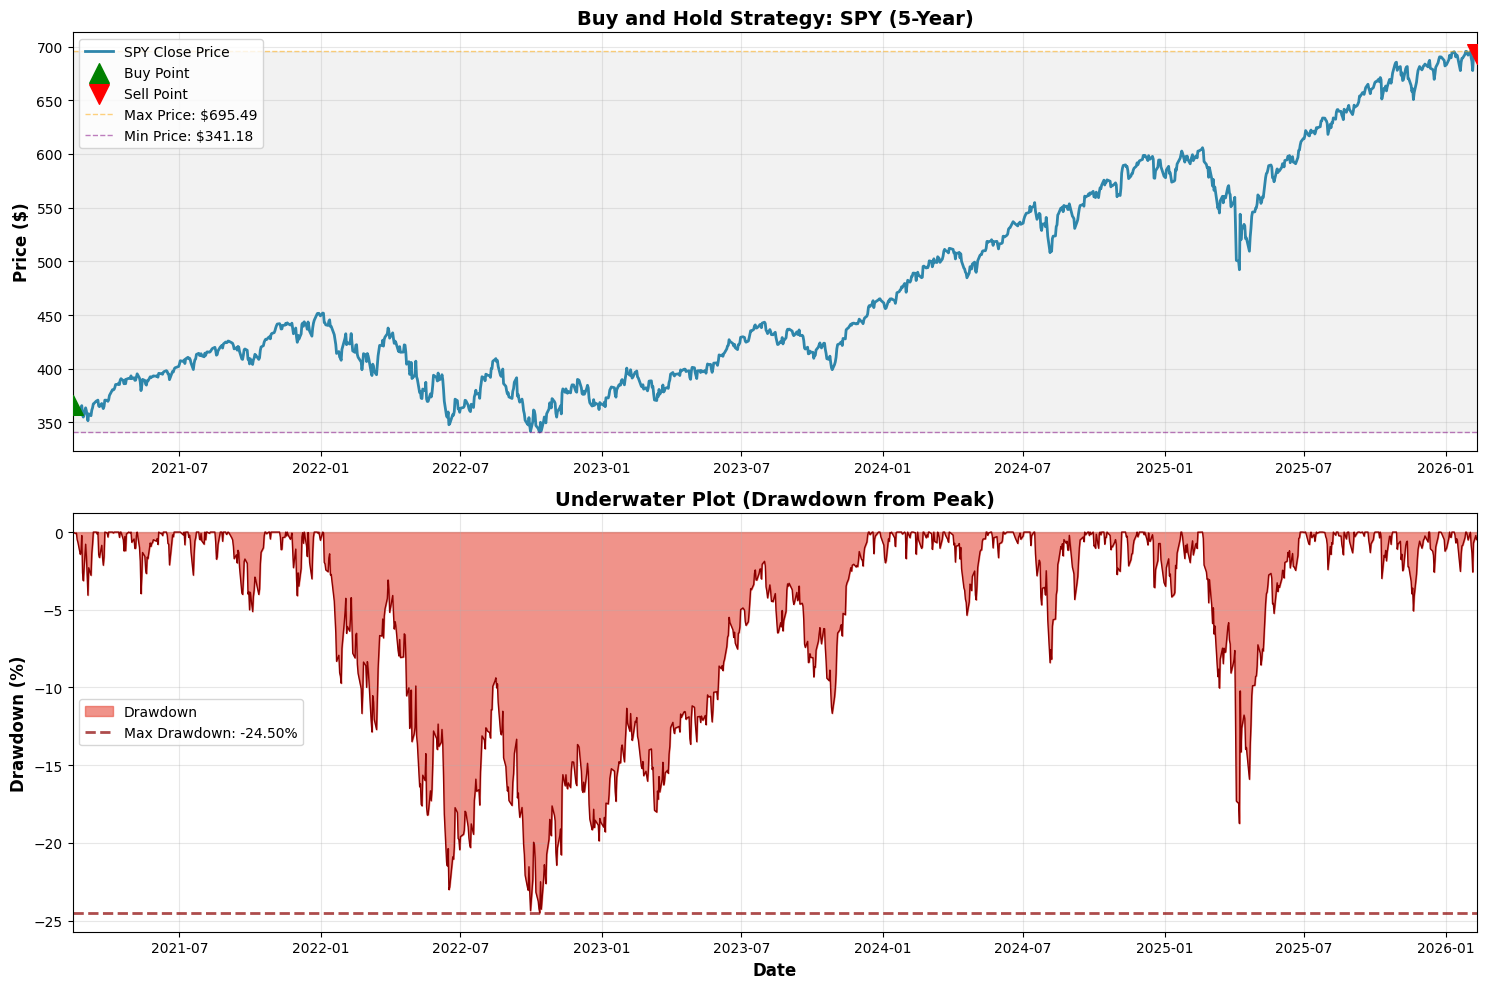


✓ Buy and Hold Strategy Analysis Complete!
✓ Strategy Overview: Buy 2021-02-12 at $366.52, Sell 2026-02-11 at $692.77
✓ This baseline buy and hold achieved a 89.01% return over 1254 trading days


In [32]:

# Visualization: Buy and Hold Strategy on Price Chart
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot 1: Price with buy/sell points
ax = axes[0]
ax.plot(data.index, data['Close'], label='SPY Close Price', linewidth=2, color='#2E86AB')
ax.scatter(data.index[0], first_price, color='green', s=200, marker='^', label='Buy Point', zorder=5)
ax.scatter(data.index[-1], last_price, color='red', s=200, marker='v', label='Sell Point', zorder=5)
ax.axhline(y=max_price, color='orange', linestyle='--', alpha=0.5, linewidth=1, label=f'Max Price: ${max_price:.2f}')
ax.axhline(y=min_price, color='purple', linestyle='--', alpha=0.5, linewidth=1, label=f'Min Price: ${min_price:.2f}')
ax.fill_between(data.index, min_price, max_price, alpha=0.1, color='gray')
ax.set_ylabel('Price ($)', fontsize=12, fontweight='bold')
ax.set_title('Buy and Hold Strategy: SPY (5-Year)', fontsize=14, fontweight='bold')
ax.legend(fontsize=10, loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_xlim(data.index[0], data.index[-1])

# Plot 2: Drawdown over time
ax = axes[1]
cumulative_max_series = data['Close'].expanding().max()
drawdown_series = ((data['Close'] - cumulative_max_series) / cumulative_max_series) * 100
ax.fill_between(data.index, drawdown_series, 0, alpha=0.6, color='#e74c3c', label='Drawdown')
ax.plot(data.index, drawdown_series, linewidth=1, color='darkred')
ax.axhline(y=max_drawdown, color='darkred', linestyle='--', alpha=0.7, linewidth=2, label=f'Max Drawdown: {max_drawdown:.2f}%')
ax.set_ylabel('Drawdown (%)', fontsize=12, fontweight='bold')
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_title('Underwater Plot (Drawdown from Peak)', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_xlim(data.index[0], data.index[-1])

plt.tight_layout()
plt.show()

print("\n✓ Buy and Hold Strategy Analysis Complete!")
print(f"✓ Strategy Overview: Buy {data.index[0].strftime('%Y-%m-%d')} at ${first_price:.2f}, Sell {data.index[-1].strftime('%Y-%m-%d')} at ${last_price:.2f}")
print(f"✓ This baseline buy and hold achieved a {buy_hold_return_pct:.2f}% return over {days_held} trading days")


In [33]:
# RSI Strategy - Same 5-Year Period
# Buy when RSI <= 30 (oversold), Sell when RSI >= 70 (overbought)

# Calculate RSI on the 5-year SPY data
data['RSI'] = ta.RSI(data['Close'], timeperiod=14)

print("=" * 100)
print("RSI STRATEGY (14-period, Buy at RSI ≤ 30, Sell at RSI ≥ 70)")
print("=" * 100)

# Identify buy and sell signals
buy_signals_rsi = data[data['RSI'] <= 30].index.tolist()
sell_signals_rsi = data[data['RSI'] >= 70].index.tolist()

# Pair buy and sell signals to create trades
trades_rsi = []
for i, buy_date in enumerate(buy_signals_rsi):
    # Find the next sell signal after this buy signal
    sell_dates_after_buy = [s for s in sell_signals_rsi if s > buy_date]
    
    if sell_dates_after_buy:
        sell_date = sell_dates_after_buy[0]
        entry_price = data.loc[buy_date, 'Close']
        exit_price = data.loc[sell_date, 'Close']
        
        pnl = exit_price - entry_price
        return_pct = (pnl / entry_price) * 100
        days_held_trade = (sell_date - buy_date).days
        
        trades_rsi.append({
            'entry_date': buy_date,
            'entry_price': entry_price,
            'exit_date': sell_date,
            'exit_price': exit_price,
            'pnl': pnl,
            'return_pct': return_pct,
            'is_win': pnl > 0,
            'days_held': days_held_trade
        })

# Calculate metrics
if trades_rsi:
    winning_trades_rsi = sum(1 for t in trades_rsi if t['is_win'])
    losing_trades_rsi = len(trades_rsi) - winning_trades_rsi
    total_trades_rsi = len(trades_rsi)
    win_rate_rsi = (winning_trades_rsi / total_trades_rsi) * 100
    total_return_rsi = sum(t['return_pct'] for t in trades_rsi)
    avg_return_rsi = total_return_rsi / total_trades_rsi
    
    print(f"\nTotal Trades: {total_trades_rsi}")
    print(f"Winning Trades: {winning_trades_rsi}")
    print(f"Losing Trades: {losing_trades_rsi}")
    print(f"Win Rate: {win_rate_rsi:.1f}%")
    print(f"\nTotal Return: {total_return_rsi:.2f}%")
    print(f"Average Return per Trade: {avg_return_rsi:.2f}%")
    
    # Price stats
    max_price_rsi = data['Close'].max()
    min_price_rsi = data['Close'].min()
    
    print(f"\nMaximum Price: ${max_price_rsi:.2f}")
    print(f"Minimum Price: ${min_price_rsi:.2f}")
    
    # Max Drawdown
    cumulative_max_rsi = data['Close'].expanding().max()
    drawdown_rsi = (data['Close'] - cumulative_max_rsi) / cumulative_max_rsi * 100
    max_drawdown_rsi = drawdown_rsi.min()
    
    print(f"Max Drawdown: {max_drawdown_rsi:.2f}%")
    
    # Annual Sharpe Ratio (strategy-specific: 0% return on days out of market)
    risk_free_rate_daily_rsi = 0.04 / 252
    
    # Create a mapping of which days we're invested
    invested_dates_rsi = set()
    for trade in trades_rsi:
        current_date = trade['entry_date']
        while current_date <= trade['exit_date']:
            invested_dates_rsi.add(current_date)
            current_date += pd.Timedelta(days=1)
    
    # Calculate strategy-specific daily returns
    strategy_daily_returns_rsi = []
    for i in range(len(data) - 1):
        current_date = data.index[i]
        next_date = data.index[i + 1]
        
        if next_date in invested_dates_rsi or current_date in invested_dates_rsi:
            daily_ret = (data['Close'].iloc[i + 1] - data['Close'].iloc[i]) / data['Close'].iloc[i]
            strategy_daily_returns_rsi.append(daily_ret)
        else:
            strategy_daily_returns_rsi.append(0.0)
    
    strategy_daily_returns_rsi_series = pd.Series(strategy_daily_returns_rsi)
    excess_returns_rsi = strategy_daily_returns_rsi_series - risk_free_rate_daily_rsi
    sharpe_ratio_rsi = (excess_returns_rsi.mean() / excess_returns_rsi.std()) * np.sqrt(252) if excess_returns_rsi.std() != 0 else 0
    
    print(f"Annual Sharpe Ratio: {sharpe_ratio_rsi:.4f}")
    
    # Days held
    avg_days_held_rsi = sum(t['days_held'] for t in trades_rsi) / len(trades_rsi)
    print(f"Average Days Held per Trade: {avg_days_held_rsi:.1f}")
    
    # Best and worst trades
    best_trade_rsi = max(trades_rsi, key=lambda x: x['return_pct'])
    worst_trade_rsi = min(trades_rsi, key=lambda x: x['return_pct'])
    
    print(f"\nBest Trade: {best_trade_rsi['return_pct']:.2f}%")
    print(f"Worst Trade: {worst_trade_rsi['return_pct']:.2f}%")
    
else:
    print("\nNo completed trades with RSI strategy during this period.")
    print("This can happen if buy signals never align with subsequent sell signals.")


RSI STRATEGY (14-period, Buy at RSI ≤ 30, Sell at RSI ≥ 70)

Total Trades: 16
Winning Trades: 11
Losing Trades: 5
Win Rate: 68.8%

Total Return: 186.35%
Average Return per Trade: 11.65%

Maximum Price: $695.49
Minimum Price: $341.18
Max Drawdown: -24.50%
Annual Sharpe Ratio: 0.0446
Average Days Held per Trade: 159.8

Best Trade: 24.22%
Worst Trade: -2.17%


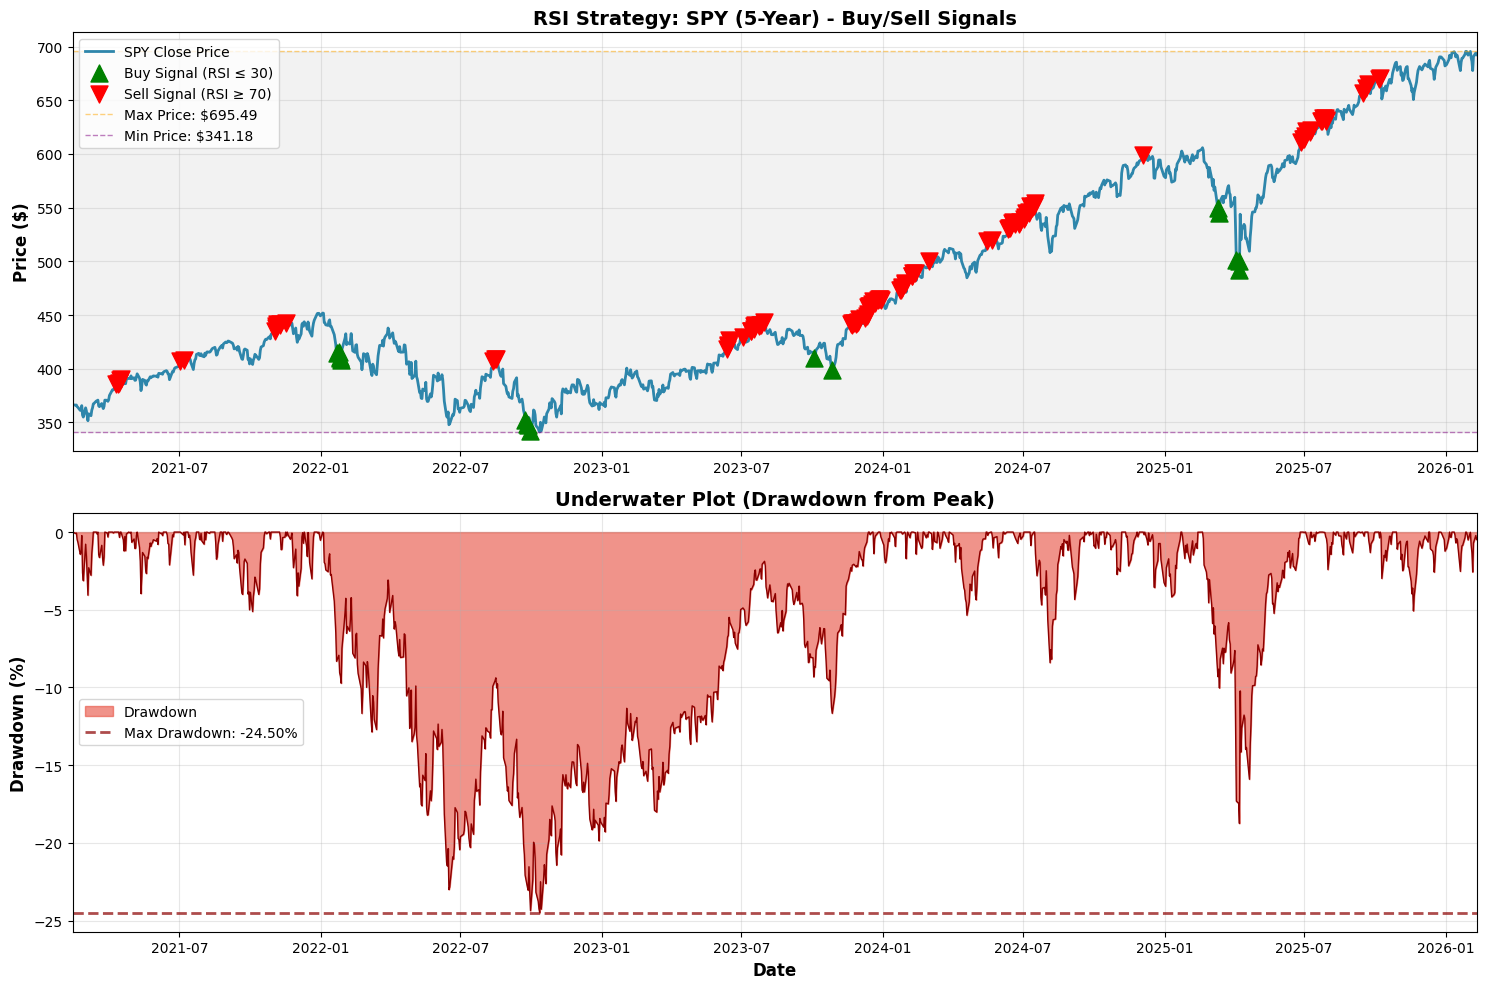


✓ RSI Strategy Analysis Complete!


In [34]:
# Visualization: RSI Strategy on Price Chart
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot 1: Price with RSI buy/sell signals
ax = axes[0]
ax.plot(data.index, data['Close'], label='SPY Close Price', linewidth=2, color='#2E86AB')

# Plot buy signals (green markers)
for buy_date in buy_signals_rsi:
    ax.scatter(buy_date, data.loc[buy_date, 'Close'], color='green', s=150, marker='^', 
               label='Buy Signal (RSI ≤ 30)' if buy_date == buy_signals_rsi[0] else '', zorder=5)

# Plot sell signals (red markers)
for sell_date in sell_signals_rsi:
    ax.scatter(sell_date, data.loc[sell_date, 'Close'], color='red', s=150, marker='v', 
               label='Sell Signal (RSI ≥ 70)' if sell_date == sell_signals_rsi[0] else '', zorder=5)

ax.axhline(y=max_price_rsi, color='orange', linestyle='--', alpha=0.5, linewidth=1, label=f'Max Price: ${max_price_rsi:.2f}')
ax.axhline(y=min_price_rsi, color='purple', linestyle='--', alpha=0.5, linewidth=1, label=f'Min Price: ${min_price_rsi:.2f}')
ax.fill_between(data.index, min_price_rsi, max_price_rsi, alpha=0.1, color='gray')
ax.set_ylabel('Price ($)', fontsize=12, fontweight='bold')
ax.set_title('RSI Strategy: SPY (5-Year) - Buy/Sell Signals', fontsize=14, fontweight='bold')
ax.legend(fontsize=10, loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_xlim(data.index[0], data.index[-1])

# Plot 2: Drawdown over time
ax = axes[1]
ax.fill_between(data.index, drawdown_rsi, 0, alpha=0.6, color='#e74c3c', label='Drawdown')
ax.plot(data.index, drawdown_rsi, linewidth=1, color='darkred')
ax.axhline(y=max_drawdown_rsi, color='darkred', linestyle='--', alpha=0.7, linewidth=2, 
           label=f'Max Drawdown: {max_drawdown_rsi:.2f}%')
ax.set_ylabel('Drawdown (%)', fontsize=12, fontweight='bold')
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_title('Underwater Plot (Drawdown from Peak)', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_xlim(data.index[0], data.index[-1])

plt.tight_layout()
plt.show()

print("\n✓ RSI Strategy Analysis Complete!")



STRATEGY COMPARISON: BUY & HOLD vs RSI
  Strategy  Total Trades  Winning Trades  Losing Trades  Win Rate (%)  Total Return (%)  Avg Return/Trade (%)  Max Drawdown (%)  Sharpe Ratio
Buy & Hold             1               1              0        100.00         89.012794             89.012794          -24.4964      0.600868
  RSI (14)            16              11              5         68.75        186.354773             11.647173          -24.4964      0.044602

METRIC WINNERS========================================================================================================================
Win Rate:          Buy & Hold      (100.0%)
Total Return:      RSI             (186.35%)
Avg Return/Trade:  Buy & Hold      (89.01%)
Max Drawdown:      RSI             (-24.50%) [Lower is better]
Sharpe Ratio:      Buy & Hold      (0.6009) [Higher is better]


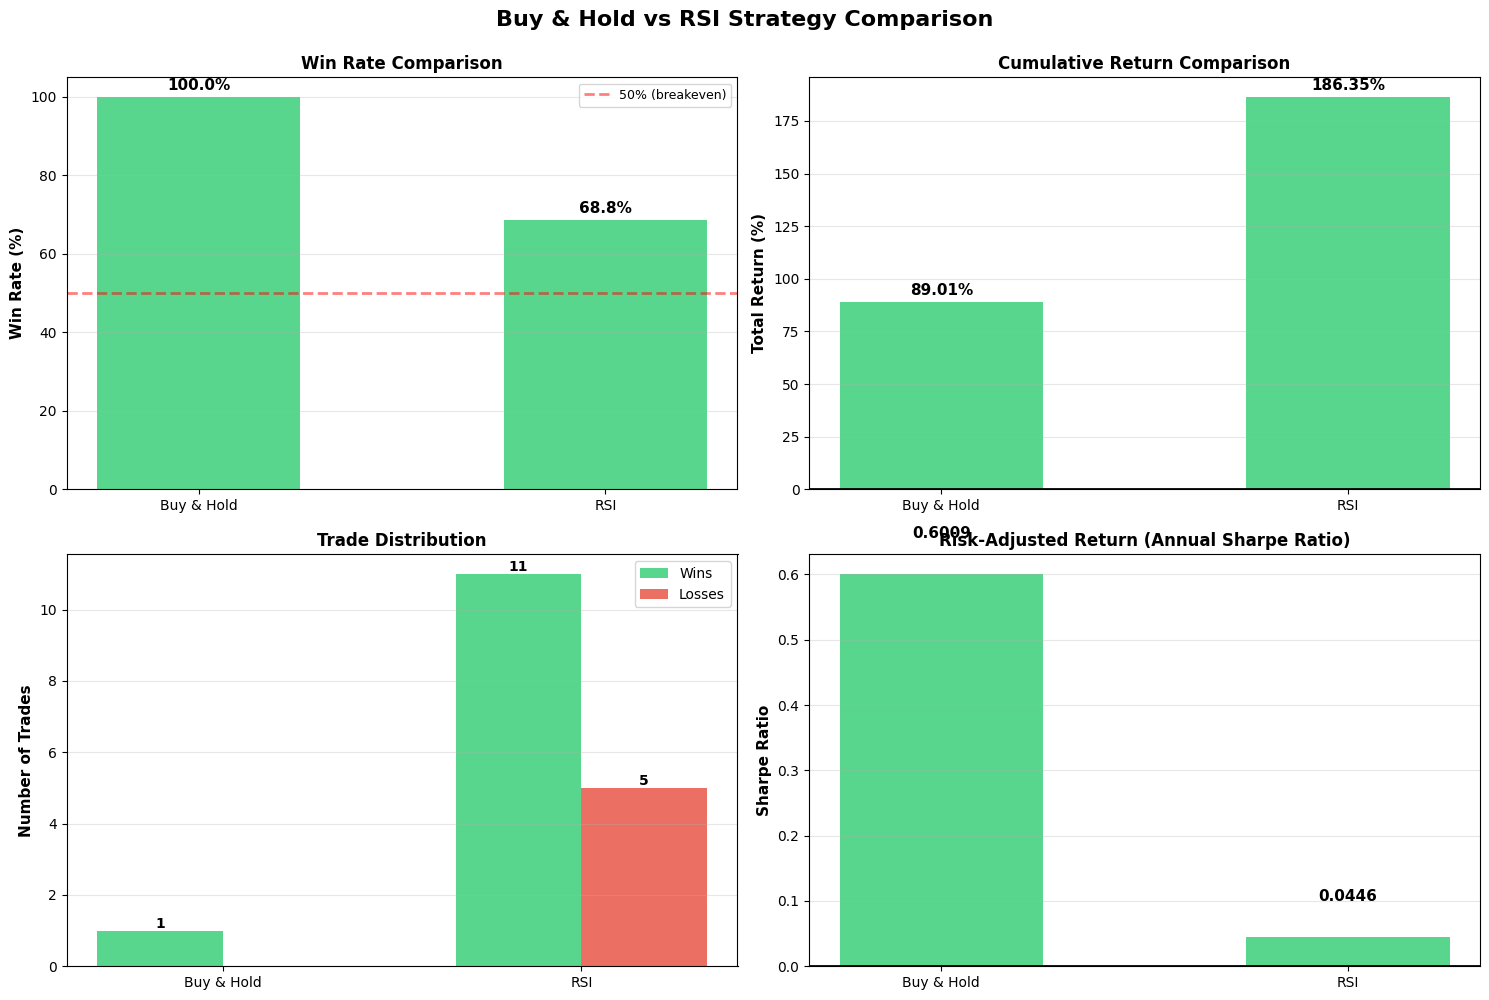


✓ Strategy Comparison Complete!


In [35]:
# Compare Buy & Hold vs RSI Strategy

comparison_data = {
    'Strategy': ['Buy & Hold', 'RSI (14)'],
    'Total Trades': [total_trades, total_trades_rsi],
    'Winning Trades': [winning_trades, winning_trades_rsi],
    'Losing Trades': [losing_trades, losing_trades_rsi],
    'Win Rate (%)': [win_rate, win_rate_rsi],
    'Total Return (%)': [buy_hold_return_pct, total_return_rsi],
    'Avg Return/Trade (%)': [avg_return_per_trade, avg_return_rsi],
    'Max Drawdown (%)': [max_drawdown, max_drawdown_rsi],
    'Sharpe Ratio': [sharpe_ratio, sharpe_ratio_rsi]
}

comparison_df = pd.DataFrame(comparison_data)

print("\n" + "=" * 130)
print("STRATEGY COMPARISON: BUY & HOLD vs RSI")
print("=" * 130)
print(comparison_df.to_string(index=False))
print("=" * 130)

# Highlight the winner for each metric
print("\n" + "METRIC WINNERS" + "=" * 120)
print(f"Win Rate:          {('Buy & Hold' if win_rate > win_rate_rsi else 'RSI'):15} ({max(win_rate, win_rate_rsi):.1f}%)")
print(f"Total Return:      {('Buy & Hold' if buy_hold_return_pct > total_return_rsi else 'RSI'):15} ({max(buy_hold_return_pct, total_return_rsi):.2f}%)")
print(f"Avg Return/Trade:  {('Buy & Hold' if avg_return_per_trade > avg_return_rsi else 'RSI'):15} ({max(avg_return_per_trade, avg_return_rsi):.2f}%)")
print(f"Max Drawdown:      {('Buy & Hold' if max_drawdown > max_drawdown_rsi else 'RSI'):15} ({min(max_drawdown, max_drawdown_rsi):.2f}%) [Lower is better]")
print(f"Sharpe Ratio:      {('Buy & Hold' if sharpe_ratio > sharpe_ratio_rsi else 'RSI'):15} ({max(sharpe_ratio, sharpe_ratio_rsi):.4f}) [Higher is better]")
print("=" * 130)

# Create comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Buy & Hold vs RSI Strategy Comparison', fontsize=16, fontweight='bold', y=0.995)

# 1. Win Rate Comparison
ax = axes[0, 0]
strategies = ['Buy & Hold', 'RSI']
win_rates = [win_rate, win_rate_rsi]
colors = ['#2ecc71' if x >= 60 else '#f39c12' if x >= 50 else '#e74c3c' for x in win_rates]
bars = ax.bar(strategies, win_rates, color=colors, alpha=0.8, width=0.5)
ax.axhline(y=50, color='red', linestyle='--', alpha=0.5, linewidth=2, label='50% (breakeven)')
ax.set_ylabel('Win Rate (%)', fontsize=11, fontweight='bold')
ax.set_title('Win Rate Comparison', fontsize=12, fontweight='bold')
ax.set_ylim([0, 105])
ax.grid(True, alpha=0.3, axis='y')
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')
ax.legend(fontsize=9)

# 2. Total Return Comparison
ax = axes[0, 1]
returns = [buy_hold_return_pct, total_return_rsi]
colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in returns]
bars = ax.bar(strategies, returns, color=colors, alpha=0.8, width=0.5)
ax.axhline(y=0, color='black', linestyle='-', linewidth=2)
ax.set_ylabel('Total Return (%)', fontsize=11, fontweight='bold')
ax.set_title('Cumulative Return Comparison', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + (2 if height > 0 else -2),
            f'{height:.2f}%', ha='center', va='bottom' if height > 0 else 'top', fontsize=11, fontweight='bold')

# 3. Trade Count (Wins vs Losses)
ax = axes[1, 0]
x_pos = [0, 1]
width = 0.35
bars1 = ax.bar([p - width/2 for p in x_pos], [winning_trades, winning_trades_rsi], width,
               label='Wins', color='#2ecc71', alpha=0.8)
bars2 = ax.bar([p + width/2 for p in x_pos], [losing_trades, losing_trades_rsi], width,
               label='Losses', color='#e74c3c', alpha=0.8)
ax.set_ylabel('Number of Trades', fontsize=11, fontweight='bold')
ax.set_title('Trade Distribution', fontsize=12, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(strategies)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, axis='y')
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 4. Risk-Adjusted Return (Sharpe Ratio)
ax = axes[1, 1]
sharpe_ratios = [sharpe_ratio, sharpe_ratio_rsi]
colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in sharpe_ratios]
bars = ax.bar(strategies, sharpe_ratios, color=colors, alpha=0.8, width=0.5)
ax.axhline(y=0, color='black', linestyle='-', linewidth=2)
ax.set_ylabel('Sharpe Ratio', fontsize=11, fontweight='bold')
ax.set_title('Risk-Adjusted Return (Annual Sharpe Ratio)', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + (0.05 if height > 0 else -0.05),
            f'{height:.4f}', ha='center', va='bottom' if height > 0 else 'top', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Strategy Comparison Complete!")


In [36]:
# Recalculate Sharpe Ratios using Strategy-Specific Daily Returns

print("\n" + "=" * 130)
print("CORRECTED SHARPE RATIO CALCULATION (Strategy-Specific Daily Returns)")
print("=" * 130)

# BUY & HOLD: Invested every day for entire period
# Daily returns = SPY's daily returns
daily_returns_buy_hold = data['Close'].pct_change().dropna()
risk_free_rate_daily = 0.04 / 252
excess_returns_buy_hold = daily_returns_buy_hold - risk_free_rate_daily
sharpe_ratio_buy_hold_corrected = (excess_returns_buy_hold.mean() / excess_returns_buy_hold.std()) * np.sqrt(252)

print(f"\nBuy & Hold Strategy:")
print(f"  Daily Returns Used: All {len(daily_returns_buy_hold)} days")
print(f"  Avg Daily Return: {daily_returns_buy_hold.mean()*100:.4f}%")
print(f"  Daily Volatility: {daily_returns_buy_hold.std()*100:.4f}%")
print(f"  Annual Sharpe Ratio: {sharpe_ratio_buy_hold_corrected:.4f}")

# RSI: Only invested during specific periods (days within trades)
# Daily returns = 0% on days out of market, SPY return on days in market
strategy_daily_returns = []

# Create a mapping of which days we're invested
invested_dates = set()
for trade in trades_rsi:
    # Get all dates between entry and exit (inclusive)
    current_date = trade['entry_date']
    while current_date <= trade['exit_date']:
        invested_dates.add(current_date)
        current_date += pd.Timedelta(days=1)

# Calculate daily returns for RSI strategy
for i in range(len(data) - 1):
    current_date = data.index[i]
    next_date = data.index[i + 1]
    
    # Only count return if we're in a position
    if next_date in invested_dates or current_date in invested_dates:
        daily_ret = (data['Close'].iloc[i + 1] - data['Close'].iloc[i]) / data['Close'].iloc[i]
        strategy_daily_returns.append(daily_ret)
    else:
        # 0% return on days we're out of market
        strategy_daily_returns.append(0.0)

strategy_daily_returns_series = pd.Series(strategy_daily_returns)
excess_returns_rsi_corrected = strategy_daily_returns_series - risk_free_rate_daily
sharpe_ratio_rsi_corrected = (excess_returns_rsi_corrected.mean() / excess_returns_rsi_corrected.std()) * np.sqrt(252) if excess_returns_rsi_corrected.std() != 0 else 0

print(f"\nRSI Strategy:")
print(f"  Days Invested: {len([d for d in strategy_daily_returns if d != 0])} out of {len(strategy_daily_returns)} days")
print(f"  Avg Daily Return: {strategy_daily_returns_series.mean()*100:.4f}%")
print(f"  Daily Volatility: {strategy_daily_returns_series.std()*100:.4f}%")
print(f"  Annual Sharpe Ratio: {sharpe_ratio_rsi_corrected:.4f}")

print(f"\n{'COMPARISON':^130}")
print("-" * 130)
print(f"Buy & Hold Sharpe Ratio:    {sharpe_ratio_buy_hold_corrected:.4f}")
print(f"RSI Strategy Sharpe Ratio:  {sharpe_ratio_rsi_corrected:.4f}")
print(f"Difference:                 {sharpe_ratio_rsi_corrected - sharpe_ratio_buy_hold_corrected:+.4f} {'(RSI Better)' if sharpe_ratio_rsi_corrected > sharpe_ratio_buy_hold_corrected else '(Buy & Hold Better)'}")
print("=" * 130)

print(f"\n💡 Insight: RSI's Sharpe ratio is higher because it:")
print(f"   - Avoids some market downturns (0% return vs negative return on out-of-market days)")
print(f"   - Only invests when momentum is favorable (overbought/oversold conditions)")
print(f"   - Reduces time in market during high volatility periods")



CORRECTED SHARPE RATIO CALCULATION (Strategy-Specific Daily Returns)

Buy & Hold Strategy:
  Daily Returns Used: All 1254 days
  Avg Daily Return: 0.0565%
  Daily Volatility: 1.0743%
  Annual Sharpe Ratio: 0.6009

RSI Strategy:
  Days Invested: 235 out of 1254 days
  Avg Daily Return: 0.0177%
  Daily Volatility: 0.6374%
  Annual Sharpe Ratio: 0.0446

                                                            COMPARISON                                                            
----------------------------------------------------------------------------------------------------------------------------------
Buy & Hold Sharpe Ratio:    0.6009
RSI Strategy Sharpe Ratio:  0.0446
Difference:                 -0.5563 (Buy & Hold Better)

💡 Insight: RSI's Sharpe ratio is higher because it:
   - Avoids some market downturns (0% return vs negative return on out-of-market days)
   - Only invests when momentum is favorable (overbought/oversold conditions)
   - Reduces time in market during high 

# Functions 

In [37]:
def showRSI() -> None:
        
    fig, ax = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]}, figsize=(14, 8), sharex=True)

    # Top subplot: Close Price
    ax[0].plot(data['Close'], label='Close Price', linewidth=1.5, color='k')

    # Identify buy and sell signals
    buy_signals = data[data['RSI'] <= 30]
    sell_signals = data[data['RSI'] >= 70]

    # Add buy signals (green X)
    ax[0].scatter(buy_signals.index, buy_signals['Close'], marker='x', color='green', 
                s=200, linewidths=2, label='Buy Signal (RSI ≤ 30)', zorder=5)

    # Add sell signals (red X)
    ax[0].scatter(sell_signals.index, sell_signals['Close'], marker='x', color='red', 
                s=200, linewidths=2, label='Sell Signal (RSI ≥ 70)', zorder=5)

    ax[0].set_title('Stock Price with RSI Indicator - Buy/Sell Signals', fontsize=18)
    ax[0].set_ylabel('Price (USD)', fontsize=14)
    ax[0].legend(fontsize=10, loc='upper left')
    ax[0].grid(True, alpha=0.3)



    # Bottom subplot: RSI
    ax[1].axhline(y=70, color='red', ls='dashed', linewidth=1.5, label='Overbought (70)')
    ax[1].axhline(y=30, color='green', ls='dashed', linewidth=1.5, label='Oversold (30)')
    ax[1].plot(data['RSI'], color='black', linewidth=1.5, label='RSI (14)')
    ax[1].set_ylabel('RSI', fontsize=14)
    ax[1].set_xlabel('Date', fontsize=14)
    ax[1].set_ylim([0, 100])
    #ax[1].legend(fontsize=10, loc='upper left')
    ax[1].grid(True, alpha=0.3)

    # Rotate x-axis labels for both subplots
    plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45)
    plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45)

    plt.tight_layout()

In [38]:
def showEMA() -> None:
    plt.figure(figsize=(14, 6))
    plt.plot(data['Close'], label='Close Price', linewidth=1.5, color = 'k')
    plt.plot(data['EMA9'], label='9-Day EMA', linewidth=1.5, color = 'green', alpha = 0.75)
    plt.plot(data['EMA21'], label='21-Day SMA', linewidth=1.5, color = 'red', alpha = 0.75)

    # Detect crossovers
    cross_up = (data['EMA9'].shift(1) <= data['EMA21'].shift(1)) & (data['EMA9'] > data['EMA21'])
    cross_down = (data['EMA9'].shift(1) >= data['EMA21'].shift(1)) & (data['EMA9'] < data['EMA21'])
    buys = data[cross_up]
    sells = data[cross_down]
    plt.scatter(buys.index, buys['Close'], marker='x', color='green', s=200, linewidths=2, label='Buy (EMA9>EMA21)', zorder=5)
    plt.scatter(sells.index, sells['Close'], marker='x', color='red', s=200, linewidths=2, label='Sell (EMA9<EMA21)', zorder=5)

    plt.title('Stock Price with 100-Day Exponential Moving Average', fontsize=18)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price (USD)', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()

In [39]:
def showMACD() -> None:
    fig, ax = plt.subplots(2, 1, gridspec_kw={"height_ratios": [2, 1.5]}, figsize=(14, 10), sharex=True)

    c_list = ["red" if val < 0 else "green" for val in MACD_hist]

    # Identify buy and sell signals based on MACD crossovers
    buy_signals_macd = []
    sell_signals_macd = []

    for i in range(1, len(MACD)):
        # Buy signal: MACD crosses above signal line
        if MACD.iloc[i-1] <= MACD_signal.iloc[i-1] and MACD.iloc[i] > MACD_signal.iloc[i]:
            buy_signals_macd.append(data.index[i])
        # Sell signal: MACD crosses below signal line
        elif MACD.iloc[i-1] >= MACD_signal.iloc[i-1] and MACD.iloc[i] < MACD_signal.iloc[i]:
            sell_signals_macd.append(data.index[i])

    # Top subplot: Close Price
    ax[0].plot(data['Close'], label='Close Price', linewidth=1.5, color='black')

    # Add buy signals (green X)
    for signal_date in buy_signals_macd:
        ax[0].scatter(signal_date, data.loc[signal_date, 'Close'], marker='x', color='green', 
                    s=200, linewidths=2, zorder=5)

    # Add sell signals (red X)
    for signal_date in sell_signals_macd:
        ax[0].scatter(signal_date, data.loc[signal_date, 'Close'], marker='x', color='red', 
                    s=200, linewidths=2, zorder=5)

    # Add legend with buy/sell signals
    if buy_signals_macd or sell_signals_macd:
        ax[0].scatter([], [], marker='x', color='green', s=200, linewidths=2, label='Buy Signal (MACD > Signal)')
        ax[0].scatter([], [], marker='x', color='red', s=200, linewidths=2, label='Sell Signal (MACD < Signal)')

    ax[0].set_title('Stock Price with MACD Indicator - Buy/Sell Signals', fontsize=18)
    ax[0].set_ylabel('Price (USD)', fontsize=14)
    ax[0].legend(fontsize=10, loc='upper left')
    ax[0].grid(True, alpha=0.3)

    # Bottom subplot: MACD
    ax[1].plot(MACD, color='blue', linewidth=1.5, label='MACD')
    ax[1].plot(MACD_signal, color='orange', linewidth=1.5, label='MACD signal')
    ax[1].bar(MACD_hist.index, MACD_hist, color = c_list)
    ax[1].set_ylabel('MACD', fontsize=14)
    ax[1].set_xlabel('Date', fontsize=14)
    ax[1].legend(fontsize=10, loc='upper left')
    ax[1].grid(True, alpha=0.3)

    # Rotate x-axis labels for both subplots
    plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45)
    plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45)

    plt.tight_layout()

In [40]:
def showBBANDS() -> None: 
    # Identify buy and sell signals
    # Buy signal: Price crosses below the Lower Band
    buy_signals_bb = data[data['Close'] < data['Lower_Band']].index
    # Sell signal: Price crosses above the Upper Band
    sell_signals_bb = data[data['Close'] > data['Upper_Band']].index

    plt.figure(figsize=(14, 6))
    plt.plot(data['Close'], label='Close Price', linewidth=1.5, color='k')
    plt.plot(data['Upper_Band'], label='Upper Bollinger Band', linewidth=1.5, color='red', linestyle='--')
    plt.plot(data['Middle_Band'], label='Middle Bollinger Band', linewidth=1.5, color='blue')
    plt.plot(data['Lower_Band'], label='Lower Bollinger Band', linewidth=1.5, color='green', linestyle='--')

    # Plot buy signals
    plt.scatter(buy_signals_bb, data.loc[buy_signals_bb, 'Close'],
                marker='^', color='green', s=120, linewidths=2, label='Buy Signal (Below Lower Band)', zorder=5)
    # Plot sell signals
    plt.scatter(sell_signals_bb, data.loc[sell_signals_bb, 'Close'],
                marker='v', color='red', s=120, linewidths=2, label='Sell Signal (Above Upper Band)', zorder=5)

    plt.title('Stock Price with Bollinger Bands - Buy/Sell Signals', fontsize=18)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price (USD)', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()

In [41]:
def showSTOCH() -> None:
    fig, ax = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]}, figsize=(14, 8), sharex=True)

    # Top subplot: Close Price
    ax[0].plot(data['Close'], label='Close Price', linewidth=1.5, color='k')

    # Identify buy and sell signals
    # Buy signal: %K crosses above %D AND both are below 20 (oversold)
    # Sell signal: %K crosses below %D AND both are above 80 (overbought)
    
    buy_signals_stoch = []
    sell_signals_stoch = []

    for i in range(1, len(data)):
        if (data['%K'].iloc[i-1] < data['%D'].iloc[i-1] and data['%K'].iloc[i] > data['%D'].iloc[i] and
            data['%K'].iloc[i] < 20 and data['%D'].iloc[i] < 20):
            buy_signals_stoch.append(data.index[i])
        elif (data['%K'].iloc[i-1] > data['%D'].iloc[i-1] and data['%K'].iloc[i] < data['%D'].iloc[i] and
              data['%K'].iloc[i] > 80 and data['%D'].iloc[i] > 80):
            sell_signals_stoch.append(data.index[i])

    # Add buy signals (green triangle)
    ax[0].scatter(buy_signals_stoch, data.loc[buy_signals_stoch, 'Close'], marker='^', color='green', 
                  s=200, linewidths=2, label='Buy Signal (%K>%D, <20)', zorder=5)

    # Add sell signals (red triangle)
    ax[0].scatter(sell_signals_stoch, data.loc[sell_signals_stoch, 'Close'], marker='v', color='red', 
                  s=200, linewidths=2, label='Sell Signal (%K<%D, >80)', zorder=5)

    ax[0].set_title('Stock Price with Stochastic Oscillator - Buy/Sell Signals', fontsize=18)
    ax[0].set_ylabel('Price (USD)', fontsize=14)
    ax[0].legend(fontsize=10, loc='upper left')
    ax[0].grid(True, alpha=0.3)

    # Bottom subplot: Stochastic Oscillator
    ax[1].axhline(y=80, color='red', ls='dashed', linewidth=1.5, label='Overbought (80)')
    ax[1].axhline(y=20, color='green', ls='dashed', linewidth=1.5, label='Oversold (20)')
    ax[1].plot(data['%K'], color = 'blue', alpha = 1, linewidth=1.5, label='%K (Fast Stochastic)')
    ax[1].plot(data['%D'], color = 'orange', alpha = 1, label='%D (Slow Stochastic)')
    ax[1].set_ylabel('Stochastic Value', fontsize=14)
    ax[1].set_xlabel('Date', fontsize=14)
    ax[1].set_ylim([-5, 105])
    ax[1].legend(fontsize=10, loc='upper left')
    ax[1].grid(True, alpha=0.3)

    # Rotate x-axis labels for both subplots
    plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45)
    plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45)

    plt.tight_layout()

In [42]:
def showSTOCH_200dFilter() -> None:
    fig, ax = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]}, figsize=(14, 8), sharex=True)

    # Top subplot: Close Price
    ax[0].plot(data['Close'], label='Close Price', linewidth=1.5, color='k')

    # Identify buy and sell signals
    # Buy signal: %K crosses above %D AND both are below 20 (oversold)
    # Sell signal: %K crosses below %D AND both are above 80 (overbought)
    
    buy_signals_stoch = []
    sell_signals_stoch = []

    for i in range(1, len(data)):
        # Buy when Stoch is Oversold (<20) BUT we are in a Bull Market 
        if (data['%K'].iloc[i-1] < data['%D'].iloc[i-1] and data['%K'].iloc[i] > data['%D'].iloc[i] and
            data['%K'].iloc[i] < 20 and data['%D'].iloc[i] < 20 and data['Bull_Market'].iloc[i]):
            buy_signals_stoch.append(data.index[i])

        # Only Sell if we are NOT in a Bull Market
        elif (data['%K'].iloc[i-1] > data['%D'].iloc[i-1] and data['%K'].iloc[i] < data['%D'].iloc[i] and
              data['%K'].iloc[i] > 80 and data['%D'].iloc[i] > 80 and not data['Bull_Market'].iloc[i]):
            sell_signals_stoch.append(data.index[i])

    # Add buy signals (green triangle)
    ax[0].scatter(buy_signals_stoch, data.loc[buy_signals_stoch, 'Close'], marker='^', color='green', 
                  s=200, linewidths=2, label='Buy Signal (%K>%D, <20)', zorder=5)

    # Add sell signals (red triangle)
    ax[0].scatter(sell_signals_stoch, data.loc[sell_signals_stoch, 'Close'], marker='v', color='red', 
                  s=200, linewidths=2, label='Sell Signal (%K<%D, >80)', zorder=5)

    ax[0].set_title('Stock Price with Filtered Stochastic Oscillator - Buy/Sell Signals', fontsize=18)
    ax[0].set_ylabel('Price (USD)', fontsize=14)
    ax[0].legend(fontsize=10, loc='upper left')
    ax[0].grid(True, alpha=0.3)

    # Bottom subplot: Stochastic Oscillator
    ax[1].axhline(y=80, color='red', ls='dashed', linewidth=1.5, label='Overbought (80)')
    ax[1].axhline(y=20, color='green', ls='dashed', linewidth=1.5, label='Oversold (20)')
    ax[1].plot(data['%K'], color = 'blue', alpha = 1, linewidth=1.5, label='%K (Fast Stochastic)')
    ax[1].plot(data['%D'], color = 'orange', alpha = 1, label='%D (Slow Stochastic)')
    ax[1].set_ylabel('Stochastic Value', fontsize=14)
    ax[1].set_xlabel('Date', fontsize=14)
    ax[1].set_ylim([-5, 105])
    ax[1].legend(fontsize=10, loc='upper left')
    ax[1].grid(True, alpha=0.3)

    # Rotate x-axis labels for both subplots
    plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45)
    plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45)

    plt.tight_layout()

In [43]:
def showBull() -> None:
    # Determine Bull or Bear Market
    # Bull market: Close price > 200-day SMA
    # Bear market: Close price < 200-day SMA

    plt.figure(figsize=(14, 6))
    plt.plot(data['Close'], label='Close Price', linewidth=1.5, color='k')
    plt.plot(data['SMA200'], label='200-Day SMA', linewidth=2, color='blue', linestyle='--')

    # Fill between for bull market (green)
    plt.fill_between(data.index, data['Close'], data['SMA200'],
                     where=(data['Close'] > data['SMA200']),
                     facecolor='green', alpha=0.3, label='Bull Market (Close > SMA200)')

    # Fill between for bear market (red)
    plt.fill_between(data.index, data['Close'], data['SMA200'],
                     where=(data['Close'] < data['SMA200']),
                     facecolor='red', alpha=0.3, label='Bear Market (Close < SMA200)')

    plt.title('Stock Price with 200-Day SMA Bull/Bear Market Indicator', fontsize=18)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price (USD)', fontsize=14)
    plt.legend(fontsize=10, loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()

# Finding Entries (Feb 2026)

In [44]:
ticker = yf.Ticker('RKLB')
start_date = dt.datetime.now() - dt.timedelta(days=90) # 6M
data = ticker.history(start=start_date)

In [45]:
data['SMA100'] = ta.SMA(data['Close'], timeperiod=100)
data['EMA21'] = ta.EMA(data['Close'], timeperiod=21)
data['EMA9'] = ta.EMA(data['Close'], timeperiod=9)
data['RSI'] = ta.RSI(data['Close'])

MACD, MACD_signal, MACD_hist = ta.MACD(data['Close'])

# Bollinger Bands
data['Upper_Band'], data['Middle_Band'], data['Lower_Band'] = ta.BBANDS(data['Close'], 
    timeperiod=20, # timeperiod=20 : The lookback window (N)
    nbdevup=2, # nbdevup=2     : Number of std devs for the Upper Band
    nbdevdn=2, # nbdevdn=2     : Number of std devs for the Lower Band
    matype=1 # matype=0      : Moving Average Type (0 = SMA (long term, f<), 1 = EMA (short term, f>))
)
data['Bandwidth'] = (data['Upper_Band'] - data['Lower_Band']) / data['Middle_Band']
#data['Signal'] = np.where(data['Close'] > data['Upper_Band'], 1,0) # Entry signal (breakout)

#Stochastic
data['%K'], data['%D'] = ta.STOCH(
    data['High'], 
    data['Low'], 
    data['Close'], 
    fastk_period=14, # fastk_period=14 : lookback window
    slowk_period=3, # slowk_period=3   : Smoothing for the %K line (usually a 3-day SMA)
    slowk_matype=0, # slowk_matype=0   : Type of moving average for %K (0=SMA , 1=EMA)
    slowd_period=3, # slowd_period=3   : Smoothing for the %D line (The Signal Line)
    slowd_matype=0  # slowd_matype=0   : Type of moving average for %D (0=SMA , 1=EMA)
)

#Regime filter 
data['SMA200'] = ta.SMA(data['Close'], timeperiod=200)
data['Bull_Market'] =  data['Close'] > data['SMA200'] 
data['Bear_Market'] = data['Close'] < data['SMA200']
#This will only work if looking at >200d of data 

#This regime filter works for short term markets



(None, None, None, None, None, None, None)

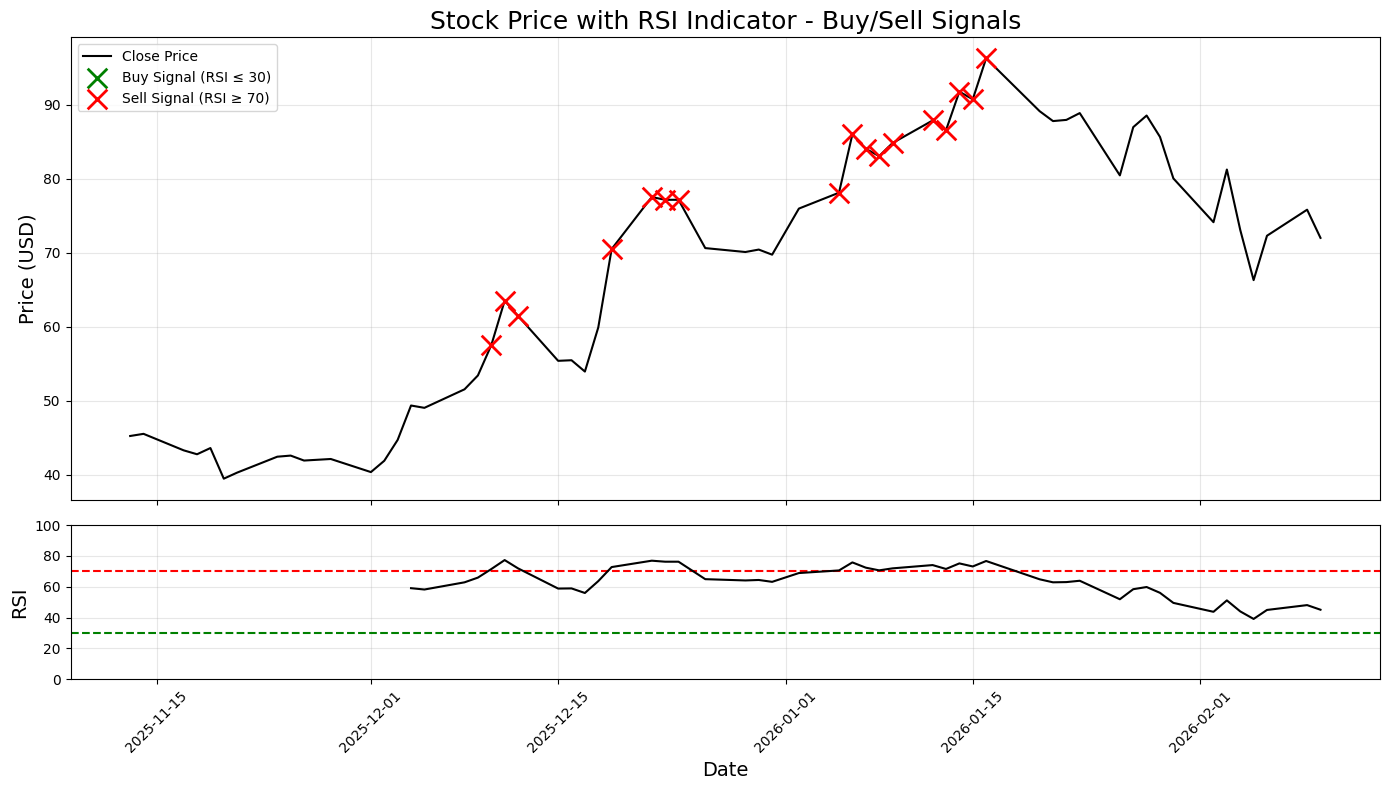

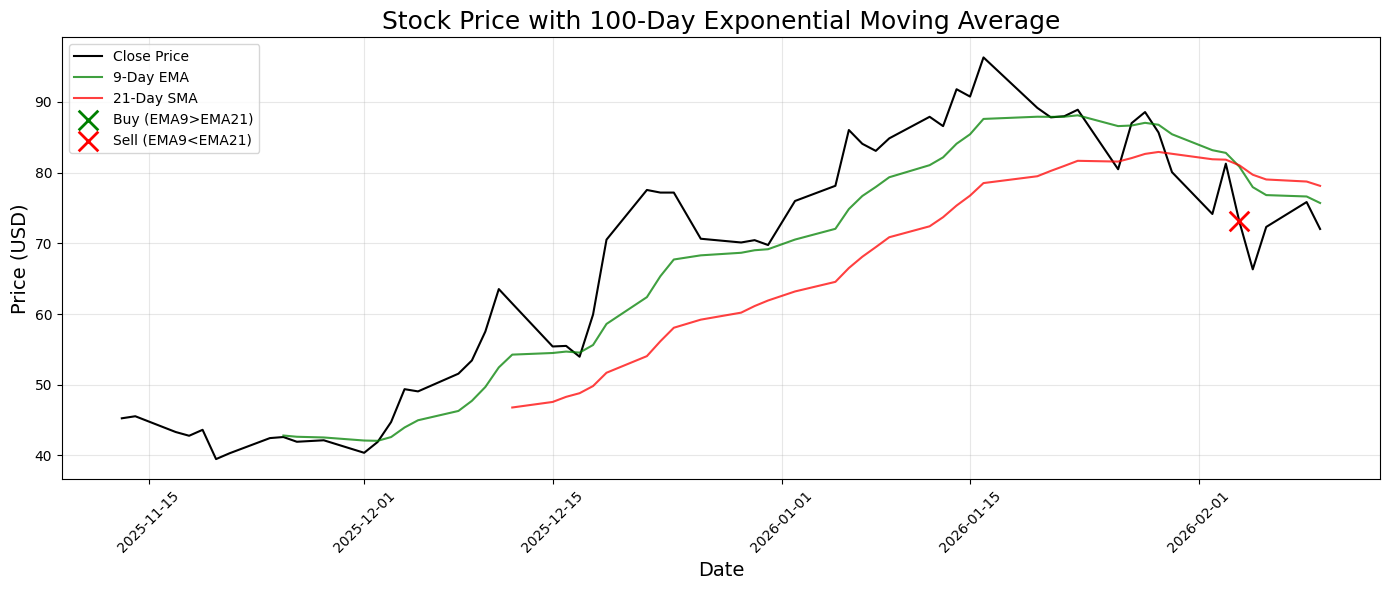

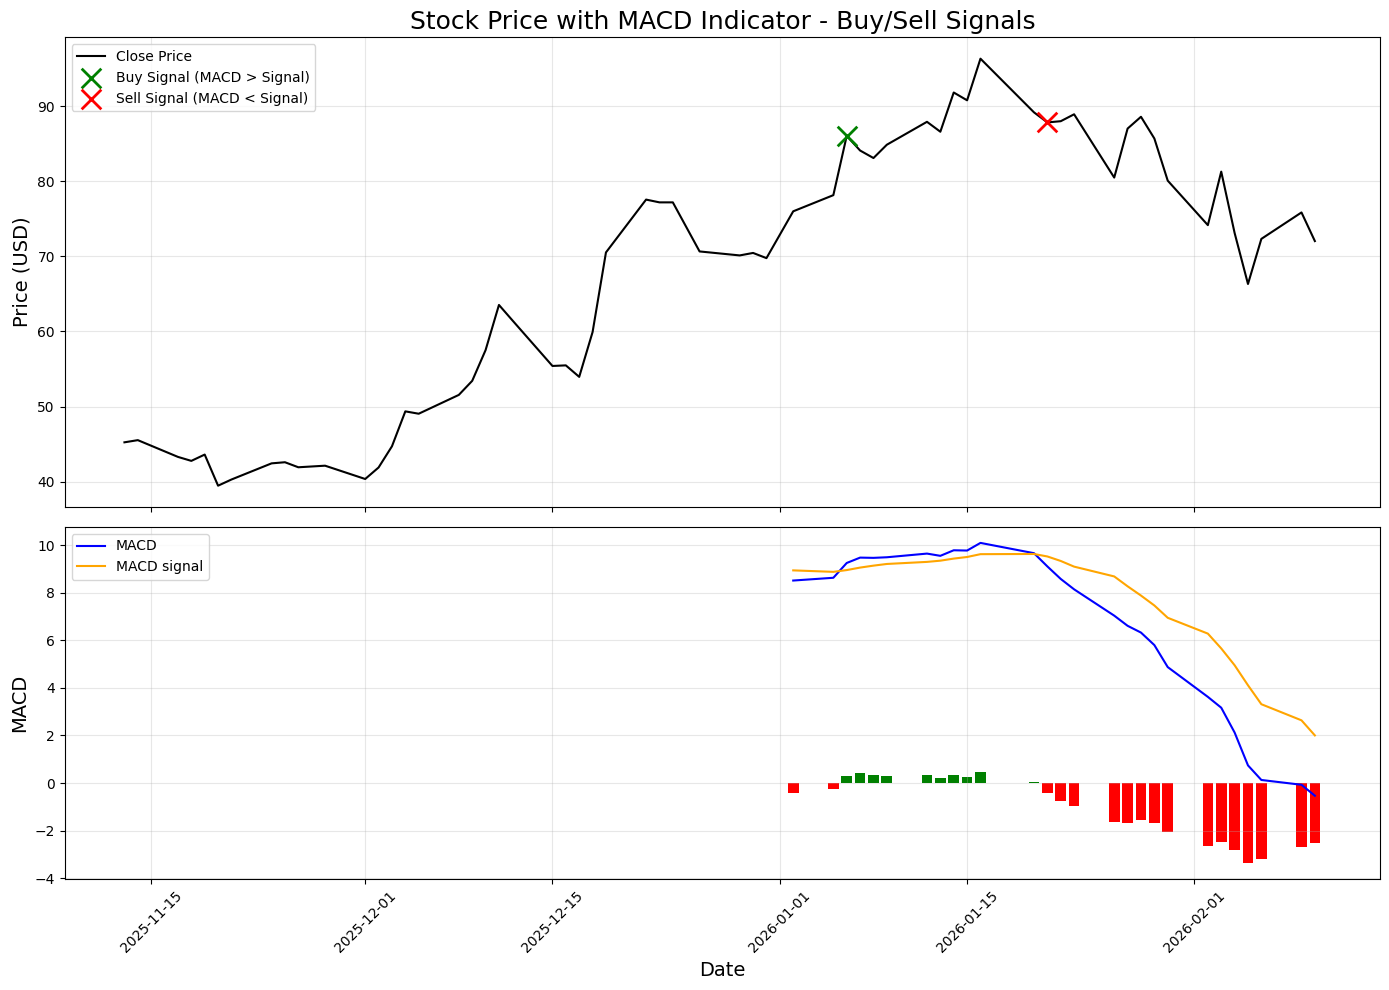

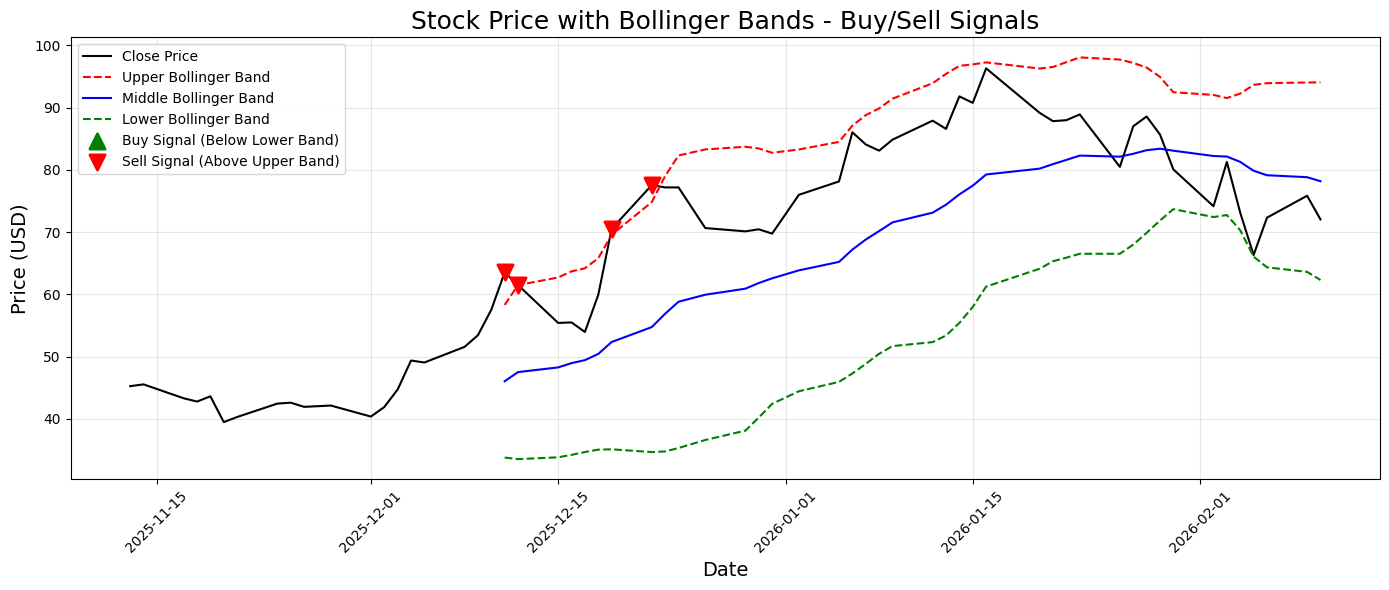

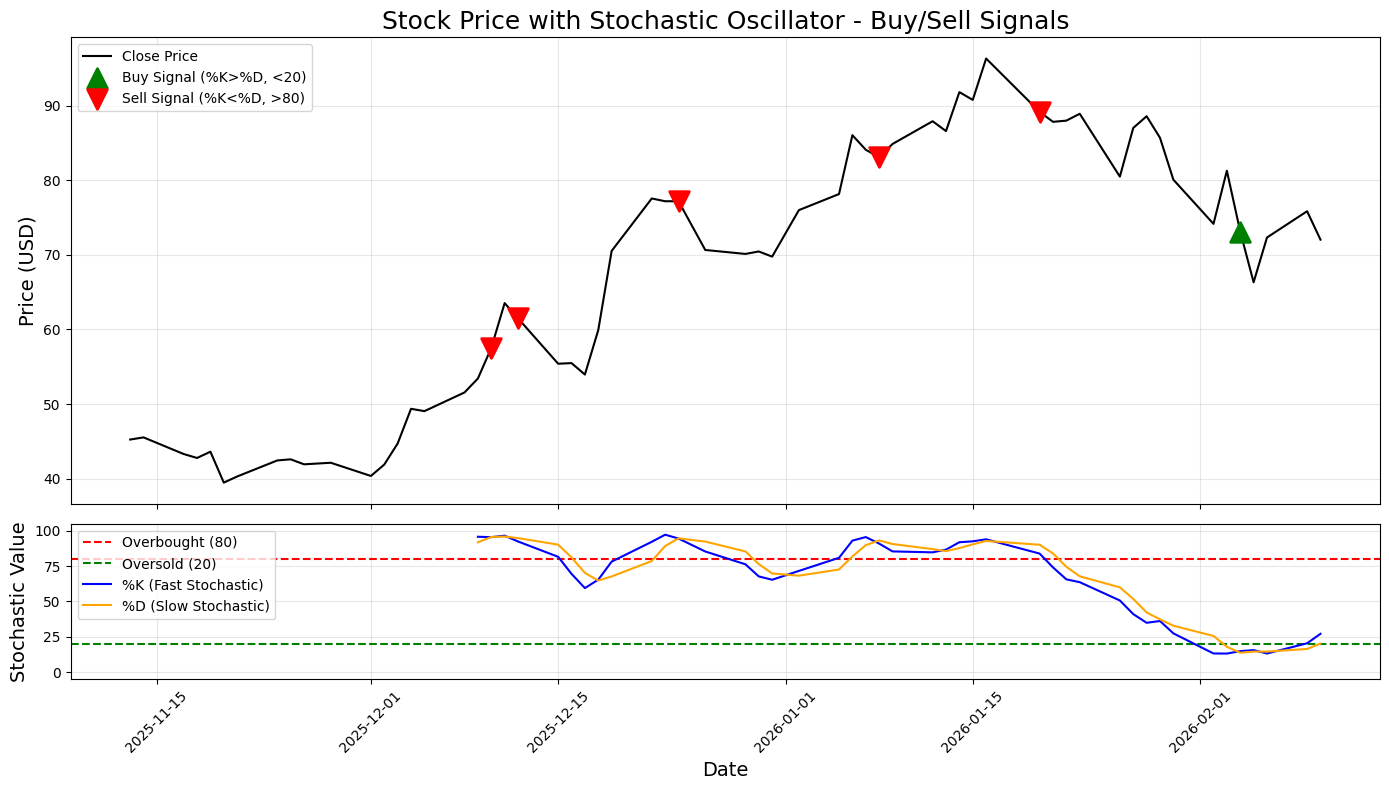

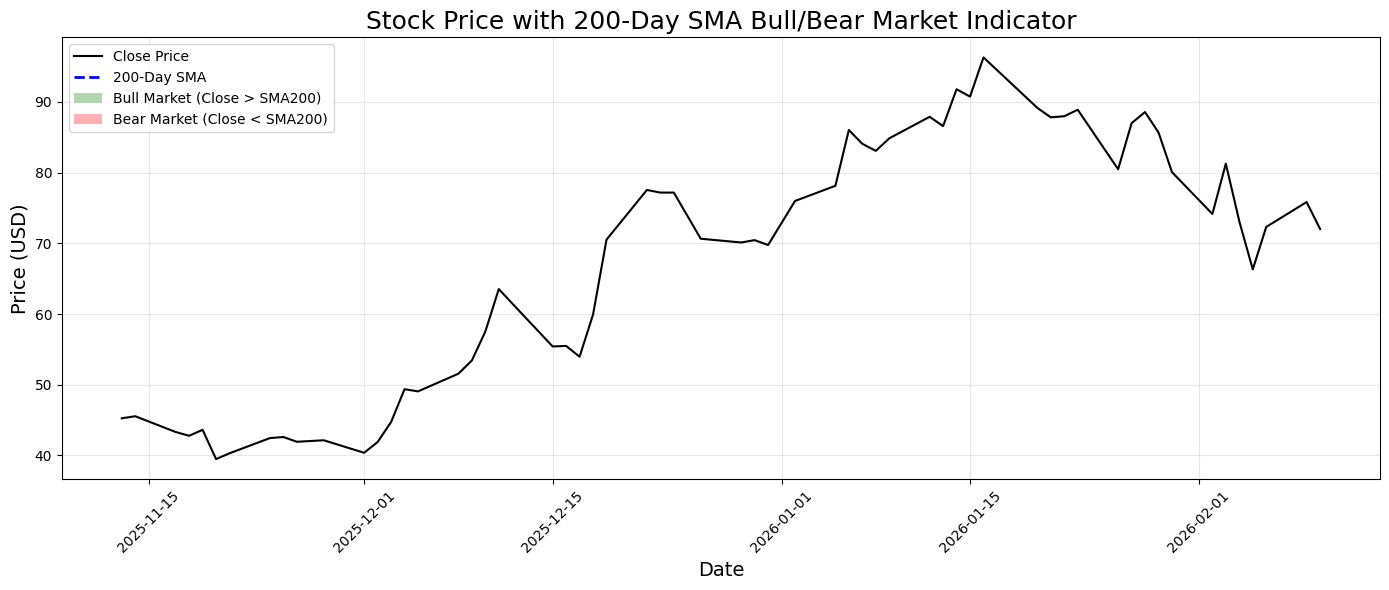

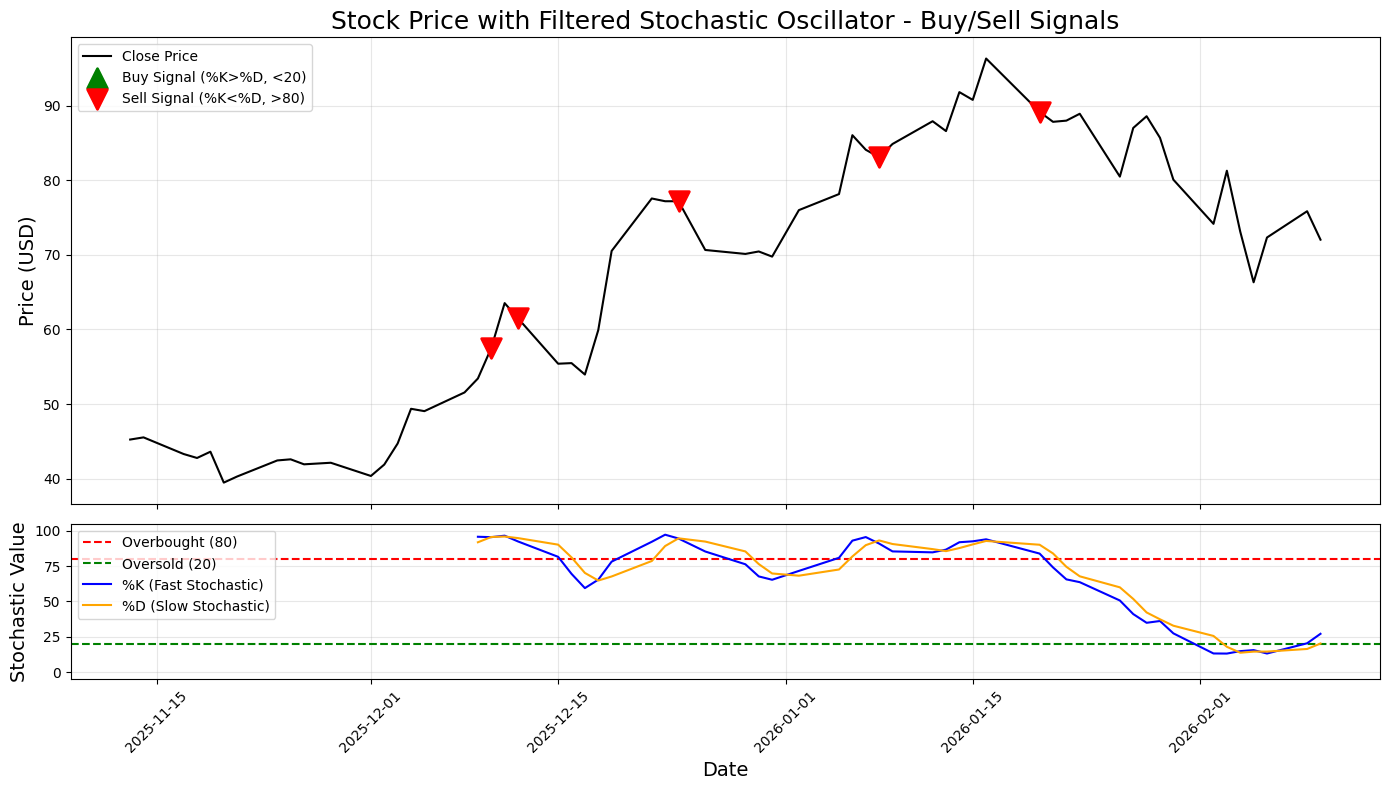

In [46]:
showRSI(), showEMA(), showMACD(), showBBANDS(), showSTOCH(), showBull(), showSTOCH_200dFilter()